In [1]:
import ipy_table
import re
%run ../aux/postgres.py

postgres functions loaded...


## categoria produtos

In [2]:
cmd = ("SELECT t.text "
       "FROM tweet t "
       "INNER JOIN resultadoanaliseprojetotweet r ON r.codtweet = t.codtweet "
       "WHERE codresultadoanaliseprojeto = 19 AND codclassificacao = 224"
       )
tweets = query(cmd)
print(len(tweets))

21833


In [3]:
print(tweets[:20])

[('Dental Implant System Surgical Brushless Motor+ 20:1 Contra Angle Handpiece USPS https://t.co/g3eW1DnLyT',), ('Dental Implant Torque Wrench https://t.co/Q6GtxnPkp3',), ('#3dprinting World’s First\nNon-Surgical, Immediate, Root Analogue, Ceramic, Dental Implant Solutions\n\nhttps://t.co/EPIN0dareY',), ("RT @ProfJeffJarviss: I'm self-installing my new dental implants tonight. Takes about 20 mins using an iPhone app and an IKEA hex key. https…",), ('Dental Implant Torque Wrench https://t.co/Q6GtxnPkp3',), ('Check out Dental implant universal adapter 4mm sq. Nobelbio and straumann [Good Tool] https://t.co/VdAzRyMWOb @eBay',), ('Check out Hex Drivers Straumann Long &amp; 1.25mm Short Dental Implant Torque https://t.co/SkegXYiefS @eBay',), ('Check out New Dental Implant Torque Wrench Universal (Adapter Only) Straumann DIO etc https://t.co/a7iPob8H7y @eBay',), ('Check out New Dental Implant Bone Expander 3.3mm 4.1mm 4.8mm Straumann Implant Advanced https://t.co/SJ9hZYwE3A @eBay',), ('A sho

# Pré-processamento

In [4]:
import re
happyFace = ['😅', '😁', '😍', '❤', '😂', '😋', '😌', '☺', '😘']
sadFace = ['😪', '😭', '😩']
neutralFace = ['😐', '😒']
scaryFace = ['😱']

def proc_emoji(tweet):
    for em in happyFace:
        tweet = tweet.replace(em, ' happyFace ')

    for em in neutralFace:
        tweet = tweet.replace(em, ' neutralFace ')

    for em in sadFace:
        tweet = tweet.replace(em, ' sadFace ')

    for em in scaryFace:
        tweet = tweet.replace(em, ' scaryFace ')
    return tweet
    
    
def pre_proc(doc_complete):
    doc_complete = [ t[0].lower() for t in doc_complete ]
    
    # mention removal
    doc_complete = [re.sub("@\\w+", "", x) for x in doc_complete ]
    # Remove URL
    doc_complete = [re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", "", x) for x in doc_complete ]
    # Remove HTML symbols
    doc_complete = [re.sub("&[^\\s]*;", " ", x) for x in doc_complete ]
    # Remove numbers
    doc_complete = [re.sub("[0-9]+", "", x) for x in doc_complete ]
    # Interrogações
    doc_complete = [re.sub("[?]", "", x) for x in doc_complete ]
    # Remove Punctuation    
    doc_complete = [re.sub("[.,\\/#!?+$–\"|%-\\^&\\*;:{}=\\-_`~()]", " ", x) for x in doc_complete ]
    # Remove Emojis
    doc_complete = [proc_emoji(x) for x in doc_complete ]
    
    pattern = re.compile('[\W_]+')
    doc_complete = [pattern.sub(' ', x) for x in doc_complete ]
    return doc_complete

In [5]:
doc_complete =  pre_proc(tweets)
doc_complete[:20]
print(len(doc_complete))

21833


In [6]:
for d in doc_complete[:20]:
    print(d)

dental implant system surgical brushless motor contra angle handpiece usps 
dental implant torque wrench 
 dprinting world s first non surgical immediate root analogue ceramic dental implant solutions 
rt i m self installing my new dental implants tonight takes about mins using an iphone app and an ikea hex key https 
dental implant torque wrench 
check out dental implant universal adapter mm sq nobelbio and straumann good tool 
check out hex drivers straumann long mm short dental implant torque 
check out new dental implant torque wrench universal adapter only straumann dio etc 
check out new dental implant bone expander mm mm mm straumann implant advanced 
a short video from our dental implant suppliers nobel biocare explaining how dental implants work 
check out universal new dental implant screw remove set broken implants screw removal 
titanium dental implants market information you need to know 
what do you know about metal free dental implants quiz 
dental implant torque wrench 

In [7]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from collections import Counter

stop = set(stopwords.words('english')).union({'dental', 'implants', 'implant', 'rt'})
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
#doc_complete = [ t[0] for t in tweets ]
#print(stop)

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop and len(i) > 3])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #normalized = [ w for w in punc_free if len(w) > 3 ]
    normalized = punc_free
    return normalized
''

doc_clean = [clean(doc).split() for doc in doc_complete] 
#print(doc_clean[:20])


print(len(doc_clean)*0.4)
ws = []
for f in doc_clean:
    for w in f:
        ws.append(w)
cws = Counter(ws)
rWords = [ x[0] for x in cws.most_common() ]
for x in cws.most_common(30):
    print(x)


8733.2
('cost', 4156)
('bone', 1811)
('torque', 1538)
('wrench', 1507)
('check', 1460)
('know', 1255)
('straumann', 1168)
('announce', 974)
('alsgd', 956)
('success', 923)
('system', 915)
('titanium', 914)
('nobel', 905)
('handpiece', 860)
('restoration', 797)
('reduction', 790)
('teeth', 786)
('rate', 773)
('biocare', 732)
('angle', 701)
('contra', 675)
('motor', 660)
('surgical', 644)
('drivers', 631)
('technology', 586)
('placement', 571)
('tooth', 570)
('graft', 561)
('systems', 561)
('long', 523)


In [8]:
for d in doc_clean[:20]:
    print(d)
print(len(doc_clean))

['system', 'surgical', 'brushless', 'motor', 'contra', 'angle', 'handpiece', 'usps']
['torque', 'wrench']
['dprinting', 'world', 'first', 'surgical', 'immediate', 'root', 'analogue', 'ceramic', 'solutions']
['self', 'installing', 'tonight', 'takes', 'mins', 'using', 'iphone', 'ikea', 'https']
['torque', 'wrench']
['check', 'universal', 'adapter', 'nobelbio', 'straumann', 'good', 'tool']
['check', 'drivers', 'straumann', 'long', 'short', 'torque']
['check', 'torque', 'wrench', 'universal', 'adapter', 'straumann']
['check', 'bone', 'expander', 'straumann', 'advanced']
['short', 'video', 'suppliers', 'nobel', 'biocare', 'explaining', 'work']
['check', 'universal', 'screw', 'remove', 'broken', 'screw', 'removal']
['titanium', 'market', 'information', 'need', 'know']
['know', 'metal', 'free', 'quiz']
['torque', 'wrench']
['goodwin', 'fund']
['braces', 'invisalign', 'complete', 'smile', 'makeover', 'full', 'mouth', 'restoration', 'help']
['torque', 'wrench']
['broken', 'screw', 'removal', 'r

# Topic Modeling

In [9]:
# Importing Gensim
import gensim
from gensim import corpora, models

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Finding number of topics

In [10]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.lda_utils import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.lda_utils.common import results_by_parameter
from tmtoolkit.lda_utils.visualize import plot_eval_results
import textmining

In [11]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [12]:
docs = {}
i=1
for doc in doc_clean:
    aux='doc'+str(i)
    docs[aux] = doc
    i+=1

In [13]:
import numpy as np
from scipy.sparse import coo_matrix
#from sets import Set

#docs = {
#    'doc1': ['python', 'text', 'data', 'nlp', 'data', 'matrix', 'mining'],
#    'doc2': ['data', 'science', 'data', 'processing', 'cleaning', 'data'],
#    'doc3': ['r', 'data', 'science', 'text', 'mining', 'nlp'],
#    'doc4': ['programming', 'c', 'algorithms', 'data', 'structures'],
#}

vocab = set()
n_nonzero = 0
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # add count of unique terms in this doc

# make a list of document names
# the order will be the same as in the dict
docnames = list(docs.keys())

#print(docnames)


docnames = np.array(docnames)
vocab = np.array(list(vocab))  

vocab_sorter = np.argsort(vocab)    # indices that sort "vocab"

ndocs = len(docnames)
nvocab = len(vocab)

data = np.empty(n_nonzero, dtype=np.intc)     # all non-zero term frequencies at data[k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for kth data item (kth term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for kth data item (kth term freq.



In [14]:
ind = 0     # current index in the sparse matrix data
# go through all documents with their terms
for docname, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    cols[ind:ind_end] = uniq_indices            # save the column index: index in 
    doc_idx = np.where(docnames == docname)     # get the document index for the document name
    rows[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

In [15]:
dtm = coo_matrix((data, (rows, cols)), shape=(ndocs, nvocab), dtype=np.intc)

In [16]:
dtm

<21833x6671 sparse matrix of type '<class 'numpy.int32'>'
	with 102428 stored elements in COOrdinate format>

### alpha: 1/k beta: 0.01

In [17]:
const_params = dict(n_iter=2000, eta=0.01)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 120
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_words

INFO:lda:<0> log likelihood: -1498358
INFO:lda:<10> log likelihood: -699775
INFO:lda:<10> log likelihood: -702585
INFO:lda:<20> log likelihood: -641998
INFO:lda:<10> log likelihood: -690202
INFO:lda:<20> log likelihood: -643489
INFO:lda:<10> log likelihood: -699868
INFO:lda:<30> log likelihood: -620048
INFO:lda:<20> log likelihood: -653634
INFO:lda:<30> log likelihood: -626210
INFO:lda:<30> log likelihood: -643185
INFO:lda:<10> log likelihood: -694744
INFO:lda:<20> log likelihood: -638333
INFO:lda:<40> log likelihood: -638277
INFO:lda:<30> log likelihood: -620665
INFO:lda:<40> log likelihood: -619602
INFO:lda:<10> log likelihood: -700435
INFO:lda:<20> log likelihood: -639551
INFO:lda:<50> log likelihood: -636141
INFO:lda:<40> log likelihood: -609267
INFO:lda:<50> log likelihood: -616058
INFO:lda:<60> log likelihood: -635000
INFO:lda:<10> log likelihood: -701852
INFO:lda:<20> log likelihood: -637992
INFO:lda:<30> log likelihood: -619004
INFO:lda:<20> log likelihood: -644717
INFO:lda:<60

INFO:lda:<170> log likelihood: -584865
INFO:lda:<120> log likelihood: -586054
INFO:lda:<490> log likelihood: -628492
INFO:lda:<140> log likelihood: -585526
INFO:lda:<500> log likelihood: -628789
INFO:lda:<360> log likelihood: -603947
INFO:lda:<40> log likelihood: -620907
INFO:lda:<250> log likelihood: -593402
INFO:lda:<510> log likelihood: -628738
INFO:lda:<110> log likelihood: -586094
INFO:lda:<370> log likelihood: -604075
INFO:lda:<40> log likelihood: -619070
INFO:lda:<520> log likelihood: -628616
INFO:lda:<200> log likelihood: -593226
INFO:lda:<180> log likelihood: -584302
INFO:lda:<380> log likelihood: -604227
INFO:lda:<530> log likelihood: -628661
INFO:lda:<260> log likelihood: -593040
INFO:lda:<150> log likelihood: -584421
INFO:lda:<130> log likelihood: -584204
INFO:lda:<540> log likelihood: -628860
INFO:lda:<390> log likelihood: -604171
INFO:lda:<210> log likelihood: -592921
INFO:lda:<100> log likelihood: -587396
INFO:lda:<550> log likelihood: -628300
INFO:lda:<270> log likeliho

INFO:lda:<1010> log likelihood: -627923
INFO:lda:<670> log likelihood: -603386
INFO:lda:<220> log likelihood: -578924
INFO:lda:<320> log likelihood: -582570
INFO:lda:<380> log likelihood: -591468
INFO:lda:<1020> log likelihood: -628007
INFO:lda:<480> log likelihood: -592153
INFO:lda:<1030> log likelihood: -628258
INFO:lda:<680> log likelihood: -603207
INFO:lda:<1040> log likelihood: -628145
INFO:lda:<490> log likelihood: -592073
INFO:lda:<120> log likelihood: -583416
INFO:lda:<390> log likelihood: -590961
INFO:lda:<1050> log likelihood: -628262
INFO:lda:<690> log likelihood: -602736
INFO:lda:<90> log likelihood: -591995
INFO:lda:<200> log likelihood: -580976
INFO:lda:<270> log likelihood: -581049
INFO:lda:<330> log likelihood: -582089
INFO:lda:<80> log likelihood: -598438
INFO:lda:<230> log likelihood: -578666
INFO:lda:<1060> log likelihood: -628696
INFO:lda:<180> log likelihood: -579879
INFO:lda:<500> log likelihood: -592151
INFO:lda:<1070> log likelihood: -628305
INFO:lda:<700> log l

INFO:lda:<1530> log likelihood: -627994
INFO:lda:<980> log likelihood: -602837
INFO:lda:<560> log likelihood: -589936
INFO:lda:<1540> log likelihood: -627904
INFO:lda:<730> log likelihood: -591212
INFO:lda:<250> log likelihood: -576836
INFO:lda:<990> log likelihood: -602578
INFO:lda:<380> log likelihood: -579630
INFO:lda:<1550> log likelihood: -628043
INFO:lda:<210> log likelihood: -578245
INFO:lda:<570> log likelihood: -589831
INFO:lda:<90> log likelihood: -599150
INFO:lda:<130> log likelihood: -584422
INFO:lda:<1560> log likelihood: -628332
INFO:lda:<1000> log likelihood: -602697
INFO:lda:<290> log likelihood: -578566
INFO:lda:<330> log likelihood: -576517
INFO:lda:<470> log likelihood: -581599
INFO:lda:<740> log likelihood: -590955
INFO:lda:<180> log likelihood: -578490
INFO:lda:<1570> log likelihood: -628365
INFO:lda:<1010> log likelihood: -602880
INFO:lda:<1580> log likelihood: -628085
INFO:lda:<390> log likelihood: -579658
INFO:lda:<580> log likelihood: -590136
INFO:lda:<1020> lo

INFO:lda:<490> log likelihood: -578534
INFO:lda:<720> log likelihood: -589889
INFO:lda:<1280> log likelihood: -602143
INFO:lda:<370> log likelihood: -576344
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<940> log likelihood: -591182
INFO:lda:<270> log likelihood: -576841
INFO:lda:<320> log likelihood: -575913
INFO:lda:<730> log likelihood: -590185
INFO:lda:<430> log likelihood: -575416
INFO:lda:<1290> log likelihood: -602349
INFO:lda:<950> log likelihood: -591012
INFO:lda:<610> log likelihood: -580777
INFO:lda:<150> log likelihood: -585957
INFO:lda:<1300> log likelihood: -602386
INFO:lda:<230> log likelihood: -576388
INFO:lda:<500> log likelihood: -578479
INFO:lda:<960> log likelihood: -590944
INFO:lda:<740> log likelihood: -590290
INFO:

INFO:lda:<1680> log likelihood: -601760
INFO:lda:<780> log likelihood: -580071
INFO:lda:<950> log likelihood: -589280
INFO:lda:<420> log likelihood: -573394
INFO:lda:<1690> log likelihood: -601678
INFO:lda:<1230> log likelihood: -590483
INFO:lda:<300> log likelihood: -574242
INFO:lda:<1700> log likelihood: -601820
INFO:lda:<560> log likelihood: -574784
INFO:lda:<960> log likelihood: -589173
INFO:lda:<790> log likelihood: -580582
INFO:lda:<650> log likelihood: -578247
INFO:lda:<1710> log likelihood: -601723
INFO:lda:<1240> log likelihood: -590553
INFO:lda:<360> log likelihood: -574506
INFO:lda:<220> log likelihood: -577391
INFO:lda:<970> log likelihood: -589242
INFO:lda:<490> log likelihood: -575750
INFO:lda:<150> log likelihood: -589126
INFO:lda:<1720> log likelihood: -602052
INFO:lda:<800> log likelihood: -580269
INFO:lda:<430> log likelihood: -573207
INFO:lda:<1250> log likelihood: -590218
INFO:lda:<660> log likelihood: -577813
INFO:lda:<1730> log likelihood: -601656
INFO:lda:<980> l

INFO:lda:<1490> log likelihood: -590361
INFO:lda:<960> log likelihood: -579461
INFO:lda:<320> log likelihood: -576054
INFO:lda:<1170> log likelihood: -588377
INFO:lda:<590> log likelihood: -575154
INFO:lda:<790> log likelihood: -577226
INFO:lda:<1500> log likelihood: -589915
INFO:lda:<440> log likelihood: -573872
INFO:lda:<1180> log likelihood: -588298
INFO:lda:<520> log likelihood: -573243
INFO:lda:<690> log likelihood: -573837
INFO:lda:<240> log likelihood: -579535
INFO:lda:<970> log likelihood: -578819
INFO:lda:<370> log likelihood: -572273
INFO:lda:<1510> log likelihood: -590334
INFO:lda:<600> log likelihood: -574949
INFO:lda:<1190> log likelihood: -588237
INFO:lda:<800> log likelihood: -577042
INFO:lda:<1520> log likelihood: -590002
INFO:lda:<270> log likelihood: -575214
INFO:lda:<0> log likelihood: -1548343
INFO:lda:<980> log likelihood: -579431
INFO:lda:<700> log likelihood: -573882
INFO:lda:<1200> log likelihood: -588457
INFO:lda:<1530> log likelihood: -590698
INFO:lda:<60> log

INFO:lda:<1440> log likelihood: -588182
INFO:lda:<640> log likelihood: -572665
INFO:lda:<1860> log likelihood: -589967
INFO:lda:<1200> log likelihood: -578600
INFO:lda:<460> log likelihood: -572059
INFO:lda:<1450> log likelihood: -587827
INFO:lda:<840> log likelihood: -573797
INFO:lda:<990> log likelihood: -577170
INFO:lda:<1870> log likelihood: -590100
INFO:lda:<1460> log likelihood: -587878
INFO:lda:<550> log likelihood: -573057
INFO:lda:<750> log likelihood: -574043
INFO:lda:<1210> log likelihood: -579217
INFO:lda:<1880> log likelihood: -590697
INFO:lda:<850> log likelihood: -573912
INFO:lda:<1470> log likelihood: -588275
INFO:lda:<650> log likelihood: -572590
INFO:lda:<1220> log likelihood: -579272
INFO:lda:<1000> log likelihood: -576914
INFO:lda:<1890> log likelihood: -589964
INFO:lda:<100> log likelihood: -599149
INFO:lda:<230> log likelihood: -581241
INFO:lda:<40> log likelihood: -626457
INFO:lda:<470> log likelihood: -572413
INFO:lda:<1480> log likelihood: -587966
INFO:lda:<190

INFO:lda:<1430> log likelihood: -578658
INFO:lda:<550> log likelihood: -571601
INFO:lda:<880> log likelihood: -573526
INFO:lda:<1730> log likelihood: -588165
INFO:lda:<1180> log likelihood: -575862
INFO:lda:<650> log likelihood: -572711
INFO:lda:<1020> log likelihood: -573682
INFO:lda:<1440> log likelihood: -579112
INFO:lda:<770> log likelihood: -572451
INFO:lda:<350> log likelihood: -574767
INFO:lda:<1740> log likelihood: -588429
INFO:lda:<400> log likelihood: -572626
INFO:lda:<1190> log likelihood: -576278
INFO:lda:<270> log likelihood: -578892
INFO:lda:<1450> log likelihood: -578468
INFO:lda:<1030> log likelihood: -572890
INFO:lda:<470> log likelihood: -572396
INFO:lda:<890> log likelihood: -573197
INFO:lda:<1750> log likelihood: -588324
INFO:lda:<1200> log likelihood: -576450
INFO:lda:<780> log likelihood: -572494
INFO:lda:<560> log likelihood: -571593
INFO:lda:<660> log likelihood: -572544
INFO:lda:<1760> log likelihood: -588726
INFO:lda:<1460> log likelihood: -578582
INFO:lda:<14

INFO:lda:<410> log likelihood: -574308
INFO:lda:<1390> log likelihood: -575769
INFO:lda:<770> log likelihood: -572162
INFO:lda:<550> log likelihood: -571699
INFO:lda:<1680> log likelihood: -578230
INFO:lda:<1200> log likelihood: -572913
INFO:lda:<50> log likelihood: -623219
INFO:lda:<180> log likelihood: -589237
INFO:lda:<0> log likelihood: -1568783
INFO:lda:<650> log likelihood: -571700
INFO:lda:<900> log likelihood: -571575
INFO:lda:<1040> log likelihood: -572981
INFO:lda:<1400> log likelihood: -575280
INFO:lda:<370> log likelihood: -579489
INFO:lda:<1690> log likelihood: -578500
INFO:lda:<1210> log likelihood: -573423
INFO:lda:<780> log likelihood: -572263
INFO:lda:<320> log likelihood: -577318
INFO:lda:<1700> log likelihood: -578687
INFO:lda:<1050> log likelihood: -572754
INFO:lda:<1410> log likelihood: -575647
INFO:lda:<910> log likelihood: -571892
INFO:lda:<480> log likelihood: -572290
INFO:lda:<660> log likelihood: -571573
INFO:lda:<1710> log likelihood: -578546
INFO:lda:<560> l

INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.045453
INFO:lda:<1220> log likelihood: -572950
INFO:lda:<490> log likelihood: -573194
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 286.754205
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.002857142857142857, 'eta': 0.01, 'n_topics': 350, 'n_iter': 2000}
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_topics: 350
INFO:lda:n_iter: 2000
INFO:lda:<1410> log likelihood: -573293
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<780> log likelihood: -570620
INFO:lda:<1650> log likelihood: -575794
INFO:lda:<920> log likelihood: -571737
INFO:lda:<650> log l

INFO:lda:<1260> log likelihood: -571342
INFO:lda:<1650> log likelihood: -572566
INFO:lda:<1920> log likelihood: -575639
INFO:lda:<1080> log likelihood: -571415
INFO:lda:<1440> log likelihood: -571971
INFO:lda:<660> log likelihood: -571042
INFO:lda:<1660> log likelihood: -572592
INFO:lda:<1930> log likelihood: -575480
INFO:lda:<1270> log likelihood: -570807
INFO:lda:<1450> log likelihood: -571641
INFO:lda:<1940> log likelihood: -575635
INFO:lda:<1090> log likelihood: -571579
INFO:lda:<1670> log likelihood: -572818
INFO:lda:<770> log likelihood: -569659
INFO:lda:<300> log likelihood: -581965
INFO:lda:<910> log likelihood: -569755
INFO:lda:<450> log likelihood: -575530
INFO:lda:<220> log likelihood: -587118
INFO:lda:<510> log likelihood: -576420
INFO:lda:<580> log likelihood: -572493
INFO:lda:<1950> log likelihood: -575771
INFO:lda:<1460> log likelihood: -572167
INFO:lda:<1280> log likelihood: -571181
INFO:lda:<670> log likelihood: -570942
INFO:lda:<1680> log likelihood: -572416
INFO:lda:

INFO:lda:<1920> log likelihood: -572251
INFO:lda:<760> log likelihood: -570912
INFO:lda:<1670> log likelihood: -572275
INFO:lda:<1270> log likelihood: -570678
INFO:lda:<660> log likelihood: -571789
INFO:lda:<200> log likelihood: -591519
INFO:lda:<1930> log likelihood: -572382
INFO:lda:<1460> log likelihood: -570449
INFO:lda:<280> log likelihood: -583137
INFO:lda:<360> log likelihood: -580815
INFO:lda:<890> log likelihood: -569417
INFO:lda:<1040> log likelihood: -569383
INFO:lda:<1680> log likelihood: -572008
INFO:lda:<1940> log likelihood: -572165
INFO:lda:<150> log likelihood: -595552
INFO:lda:<590> log likelihood: -575193
INFO:lda:<1280> log likelihood: -570464
INFO:lda:<770> log likelihood: -570498
INFO:lda:<1470> log likelihood: -570957
INFO:lda:<1690> log likelihood: -572030
INFO:lda:<1950> log likelihood: -572100
INFO:lda:<670> log likelihood: -572840
INFO:lda:<1050> log likelihood: -568944
INFO:lda:<1290> log likelihood: -570241
INFO:lda:<1960> log likelihood: -571847
INFO:lda:<

INFO:lda:<1940> log likelihood: -571962
INFO:lda:<120> log likelihood: -604088
INFO:lda:<1470> log likelihood: -570375
INFO:lda:<1200> log likelihood: -568624
INFO:lda:<880> log likelihood: -569869
INFO:lda:<680> log likelihood: -573794
INFO:lda:<1950> log likelihood: -571729
INFO:lda:<1020> log likelihood: -569091
INFO:lda:<1680> log likelihood: -570143
INFO:lda:<770> log likelihood: -571691
INFO:lda:<350> log likelihood: -580889
INFO:lda:<1480> log likelihood: -570279
INFO:lda:<1960> log likelihood: -571990
INFO:lda:<1210> log likelihood: -569429
INFO:lda:<1690> log likelihood: -570243
INFO:lda:<440> log likelihood: -579541
INFO:lda:<270> log likelihood: -587369
INFO:lda:<610> log likelihood: -574204
INFO:lda:<1970> log likelihood: -571546
INFO:lda:<30> log likelihood: -659128
INFO:lda:<890> log likelihood: -569834
INFO:lda:<1490> log likelihood: -570015
INFO:lda:<70> log likelihood: -623122
INFO:lda:<210> log likelihood: -591342
INFO:lda:<1030> log likelihood: -569460
INFO:lda:<1220

INFO:lda:<1390> log likelihood: -568609
INFO:lda:<780> log likelihood: -573213
INFO:lda:<1940> log likelihood: -569749
INFO:lda:<1180> log likelihood: -568959
INFO:lda:<1710> log likelihood: -570039
INFO:lda:<1950> log likelihood: -570087
INFO:lda:<1400> log likelihood: -568758
INFO:lda:<30> log likelihood: -663761
INFO:lda:<1020> log likelihood: -569209
INFO:lda:<520> log likelihood: -578374
INFO:lda:<700> log likelihood: -573618
INFO:lda:<890> log likelihood: -570639
INFO:lda:<340> log likelihood: -584468
INFO:lda:<1190> log likelihood: -569243
INFO:lda:<180> log likelihood: -597072
INFO:lda:<1960> log likelihood: -570282
INFO:lda:<1720> log likelihood: -570137
INFO:lda:<120> log likelihood: -609958
INFO:lda:<790> log likelihood: -573175
INFO:lda:<430> log likelihood: -578959
INFO:lda:<1410> log likelihood: -568883
INFO:lda:<1970> log likelihood: -569793
INFO:lda:<1030> log likelihood: -569484
INFO:lda:<280> log likelihood: -587844
INFO:lda:<1730> log likelihood: -570126
INFO:lda:<12

INFO:lda:<1970> log likelihood: -569895
INFO:lda:<1020> log likelihood: -571116
INFO:lda:<1360> log likelihood: -568576
INFO:lda:<240> log likelihood: -593426
INFO:lda:<1610> log likelihood: -568749
INFO:lda:<1980> log likelihood: -569780
INFO:lda:<810> log likelihood: -572027
INFO:lda:<180> log likelihood: -602509
INFO:lda:<420> log likelihood: -583172
INFO:lda:<1180> log likelihood: -569032
INFO:lda:<520> log likelihood: -577568
INFO:lda:<1030> log likelihood: -570934
INFO:lda:<1370> log likelihood: -568885
INFO:lda:<1990> log likelihood: -570355
INFO:lda:<30> log likelihood: -672364
INFO:lda:<620> log likelihood: -577203
INFO:lda:<360> log likelihood: -584552
INFO:lda:<910> log likelihood: -572626
INFO:lda:<1620> log likelihood: -568529
INFO:lda:<130> log likelihood: -614944
INFO:lda:<1999> log likelihood: -569601
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -570355.083756
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.042221
INFO:lda:<1190> log

INFO:lda:<1570> log likelihood: -568606
INFO:lda:<1860> log likelihood: -568721
INFO:lda:<940> log likelihood: -571776
INFO:lda:<190> log likelihood: -608512
INFO:lda:<730> log likelihood: -575878
INFO:lda:<1180> log likelihood: -569934
INFO:lda:<620> log likelihood: -576616
INFO:lda:<130> log likelihood: -619145
INFO:lda:<520> log likelihood: -581103
INFO:lda:<1370> log likelihood: -568908
INFO:lda:<1050> log likelihood: -572341
INFO:lda:<30> log likelihood: -677318
INFO:lda:<250> log likelihood: -597643
INFO:lda:<1870> log likelihood: -568703
INFO:lda:<1580> log likelihood: -568242
INFO:lda:<950> log likelihood: -571414
INFO:lda:<320> log likelihood: -589898
INFO:lda:<1880> log likelihood: -568798
INFO:lda:<450> log likelihood: -582306
INFO:lda:<1380> log likelihood: -569468
INFO:lda:<1190> log likelihood: -570381
INFO:lda:<1060> log likelihood: -572550
INFO:lda:<1590> log likelihood: -568808
INFO:lda:<740> log likelihood: -576157
INFO:lda:<630> log likelihood: -576525
INFO:lda:<1890

INFO:lda:<860> log likelihood: -575417
INFO:lda:<740> log likelihood: -576130
INFO:lda:<1820> log likelihood: -567699
INFO:lda:<1370> log likelihood: -570455
INFO:lda:<1090> log likelihood: -571518
INFO:lda:<330> log likelihood: -594787
INFO:lda:<1590> log likelihood: -568786
INFO:lda:<1220> log likelihood: -572217
INFO:lda:<640> log likelihood: -578805
INFO:lda:<1830> log likelihood: -568221
INFO:lda:<870> log likelihood: -575677
INFO:lda:<550> log likelihood: -581422
INFO:lda:<750> log likelihood: -575820
INFO:lda:<1380> log likelihood: -570208
INFO:lda:<1600> log likelihood: -568932
INFO:lda:<1100> log likelihood: -571181
INFO:lda:<270> log likelihood: -602073
INFO:lda:<130> log likelihood: -625959
INFO:lda:<1230> log likelihood: -572255
INFO:lda:<1840> log likelihood: -567824
INFO:lda:<410> log likelihood: -587698
INFO:lda:<1390> log likelihood: -570475
INFO:lda:<1610> log likelihood: -568776
INFO:lda:<200> log likelihood: -610421
INFO:lda:<880> log likelihood: -575735
INFO:lda:<34

INFO:lda:<1260> log likelihood: -571267
INFO:lda:<760> log likelihood: -577311
INFO:lda:<1580> log likelihood: -570616
INFO:lda:<190> log likelihood: -618169
INFO:lda:<1840> log likelihood: -568299
INFO:lda:<1020> log likelihood: -574656
INFO:lda:<1410> log likelihood: -571488
INFO:lda:<270> log likelihood: -605257
INFO:lda:<670> log likelihood: -579691
INFO:lda:<890> log likelihood: -575402
INFO:lda:<1270> log likelihood: -571285
INFO:lda:<1590> log likelihood: -569554
INFO:lda:<510> log likelihood: -585270
INFO:lda:<770> log likelihood: -577569
INFO:lda:<430> log likelihood: -591780
INFO:lda:<1850> log likelihood: -568613
INFO:lda:<120> log likelihood: -636052
INFO:lda:<1420> log likelihood: -571755
INFO:lda:<1030> log likelihood: -574686
INFO:lda:<1600> log likelihood: -570180
INFO:lda:<360> log likelihood: -598773
INFO:lda:<1280> log likelihood: -570659
INFO:lda:<1860> log likelihood: -568484
INFO:lda:<900> log likelihood: -574962
INFO:lda:<680> log likelihood: -579423
INFO:lda:<14

INFO:lda:<620> log likelihood: -584184
INFO:lda:<170> log likelihood: -630221
INFO:lda:<1830> log likelihood: -569660
INFO:lda:<260> log likelihood: -613193
INFO:lda:<1630> log likelihood: -571372
INFO:lda:<450> log likelihood: -595738
INFO:lda:<810> log likelihood: -578318
INFO:lda:<1200> log likelihood: -573723
INFO:lda:<1640> log likelihood: -570313
INFO:lda:<1470> log likelihood: -571001
INFO:lda:<1840> log likelihood: -569637
INFO:lda:<920> log likelihood: -576727
INFO:lda:<1060> log likelihood: -574406
INFO:lda:<540> log likelihood: -588969
INFO:lda:<360> log likelihood: -600814
INFO:lda:<1210> log likelihood: -573859
INFO:lda:<1850> log likelihood: -570001
INFO:lda:<1650> log likelihood: -571106
INFO:lda:<630> log likelihood: -584452
INFO:lda:<820> log likelihood: -578169
INFO:lda:<1480> log likelihood: -570067
INFO:lda:<1070> log likelihood: -574007
INFO:lda:<460> log likelihood: -595612
INFO:lda:<930> log likelihood: -575926
INFO:lda:<1860> log likelihood: -569995
INFO:lda:<16

INFO:lda:<970> log likelihood: -577644
INFO:lda:<660> log likelihood: -586759
INFO:lda:<1240> log likelihood: -573359
INFO:lda:<1690> log likelihood: -570475
INFO:lda:<1890> log likelihood: -571206
INFO:lda:<1090> log likelihood: -575559
INFO:lda:<1410> log likelihood: -572521
INFO:lda:<760> log likelihood: -582720
INFO:lda:<1900> log likelihood: -570364
INFO:lda:<1700> log likelihood: -570372
INFO:lda:<1250> log likelihood: -573776
INFO:lda:<980> log likelihood: -577114
INFO:lda:<460> log likelihood: -598480
INFO:lda:<1420> log likelihood: -572946
INFO:lda:<1100> log likelihood: -575426
INFO:lda:<670> log likelihood: -586496
INFO:lda:<350> log likelihood: -609103
INFO:lda:<1910> log likelihood: -570600
INFO:lda:<570> log likelihood: -593779
INFO:lda:<1710> log likelihood: -570002
INFO:lda:<240> log likelihood: -624421
INFO:lda:<770> log likelihood: -582965
INFO:lda:<1260> log likelihood: -573539
INFO:lda:<1430> log likelihood: -573153
INFO:lda:<990> log likelihood: -577393
INFO:lda:<1

INFO:lda:<310> log likelihood: -619110
INFO:lda:<1960> log likelihood: -569352
INFO:lda:<920> log likelihood: -582261
INFO:lda:<1660> log likelihood: -572691
INFO:lda:<1470> log likelihood: -573211
INFO:lda:<1300> log likelihood: -574642
INFO:lda:<1970> log likelihood: -569425
INFO:lda:<1170> log likelihood: -577322
INFO:lda:<700> log likelihood: -592044
INFO:lda:<820> log likelihood: -584996
INFO:lda:<1670> log likelihood: -573116
INFO:lda:<1980> log likelihood: -569826
INFO:lda:<1480> log likelihood: -573157
INFO:lda:<580> log likelihood: -595589
INFO:lda:<930> log likelihood: -582273
INFO:lda:<1310> log likelihood: -574416
INFO:lda:<1180> log likelihood: -576444
INFO:lda:<450> log likelihood: -605312
INFO:lda:<1680> log likelihood: -572314
INFO:lda:<1990> log likelihood: -569410
INFO:lda:<1490> log likelihood: -573104
INFO:lda:<830> log likelihood: -584427
INFO:lda:<1320> log likelihood: -574433
INFO:lda:<320> log likelihood: -618668
INFO:lda:<710> log likelihood: -591759
INFO:lda:<

INFO:lda:<1000> log likelihood: -583887
INFO:lda:<1960> log likelihood: -572797
INFO:lda:<1400> log likelihood: -576492
INFO:lda:<860> log likelihood: -590096
INFO:lda:<720> log likelihood: -593499
INFO:lda:<1750> log likelihood: -572531
INFO:lda:<1560> log likelihood: -573249
INFO:lda:<1120> log likelihood: -581639
INFO:lda:<1970> log likelihood: -573040
INFO:lda:<1410> log likelihood: -576103
INFO:lda:<1760> log likelihood: -572383
INFO:lda:<1010> log likelihood: -583577
INFO:lda:<410> log likelihood: -615061
INFO:lda:<570> log likelihood: -604258
INFO:lda:<1570> log likelihood: -573526
INFO:lda:<870> log likelihood: -589652
INFO:lda:<1980> log likelihood: -571790
INFO:lda:<730> log likelihood: -593032
INFO:lda:<1130> log likelihood: -581032
INFO:lda:<1770> log likelihood: -572399
INFO:lda:<1420> log likelihood: -576593
INFO:lda:<1990> log likelihood: -572513
INFO:lda:<1580> log likelihood: -573470
INFO:lda:<1020> log likelihood: -583585
INFO:lda:<1780> log likelihood: -572446
INFO:l

INFO:lda:<1350> log likelihood: -580171
INFO:lda:<1060> log likelihood: -588909
INFO:lda:<1220> log likelihood: -583502
INFO:lda:<890> log likelihood: -592074
INFO:lda:<1860> log likelihood: -572697
INFO:lda:<1680> log likelihood: -575562
INFO:lda:<710> log likelihood: -601347
INFO:lda:<1360> log likelihood: -580354
INFO:lda:<1230> log likelihood: -582882
INFO:lda:<1070> log likelihood: -588751
INFO:lda:<1870> log likelihood: -572836
INFO:lda:<520> log likelihood: -611801
INFO:lda:<1690> log likelihood: -575735
INFO:lda:<900> log likelihood: -591943
INFO:lda:<1370> log likelihood: -580806
INFO:lda:<1880> log likelihood: -573302
INFO:lda:<1240> log likelihood: -583535
INFO:lda:<1080> log likelihood: -588521
INFO:lda:<1700> log likelihood: -575959
INFO:lda:<720> log likelihood: -601615
INFO:lda:<1890> log likelihood: -572557
INFO:lda:<1380> log likelihood: -581122
INFO:lda:<910> log likelihood: -592034
INFO:lda:<1710> log likelihood: -575814
INFO:lda:<1250> log likelihood: -583225
INFO:l

INFO:lda:<1670> log likelihood: -580181
INFO:lda:<660> log likelihood: -608360
INFO:lda:<1130> log likelihood: -591218
INFO:lda:<1520> log likelihood: -582238
INFO:lda:<1330> log likelihood: -587492
INFO:lda:<1680> log likelihood: -579294
INFO:lda:<910> log likelihood: -599671
INFO:lda:<1530> log likelihood: -581710
INFO:lda:<1140> log likelihood: -591438
INFO:lda:<1340> log likelihood: -588110
INFO:lda:<1690> log likelihood: -580097
INFO:lda:<670> log likelihood: -608257
INFO:lda:<1540> log likelihood: -582766
INFO:lda:<1700> log likelihood: -579306
INFO:lda:<1350> log likelihood: -587929
INFO:lda:<1150> log likelihood: -590571
INFO:lda:<920> log likelihood: -599597
INFO:lda:<1550> log likelihood: -582264
INFO:lda:<1710> log likelihood: -579673
INFO:lda:<680> log likelihood: -607857
INFO:lda:<1360> log likelihood: -587422
INFO:lda:<1160> log likelihood: -590448
INFO:lda:<930> log likelihood: -599573
INFO:lda:<1720> log likelihood: -579608
INFO:lda:<1560> log likelihood: -581749
INFO:l

INFO:lda:<1950> log likelihood: -581647
INFO:lda:<880> log likelihood: -605630
INFO:lda:<1720> log likelihood: -586943
INFO:lda:<1480> log likelihood: -590124
INFO:lda:<1190> log likelihood: -597886
INFO:lda:<1960> log likelihood: -581832
INFO:lda:<1730> log likelihood: -586639
INFO:lda:<1490> log likelihood: -589778
INFO:lda:<1970> log likelihood: -581612
INFO:lda:<1200> log likelihood: -597510
INFO:lda:<890> log likelihood: -604888
INFO:lda:<1740> log likelihood: -586567
INFO:lda:<1980> log likelihood: -580847
INFO:lda:<1500> log likelihood: -590104
INFO:lda:<1750> log likelihood: -586829
INFO:lda:<1210> log likelihood: -597518
INFO:lda:<1990> log likelihood: -581203
INFO:lda:<900> log likelihood: -604612
INFO:lda:<1510> log likelihood: -590061
INFO:lda:<1760> log likelihood: -586665
INFO:lda:<1999> log likelihood: -581527
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -581203.021934
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.036153
INFO:lda:<1

INFO:lda:<1760> log likelihood: -595853
INFO:lda:<1320> log likelihood: -602457
INFO:lda:<1770> log likelihood: -596079
INFO:lda:<1330> log likelihood: -602080
INFO:lda:<1780> log likelihood: -595796
INFO:lda:<1340> log likelihood: -601606
INFO:lda:<1790> log likelihood: -595717
INFO:lda:<1350> log likelihood: -601709
INFO:lda:<1800> log likelihood: -596200
INFO:lda:<1810> log likelihood: -595542
INFO:lda:<1360> log likelihood: -601822
INFO:lda:<1820> log likelihood: -596458
INFO:lda:<1370> log likelihood: -601906
INFO:lda:<1830> log likelihood: -595283
INFO:lda:<1840> log likelihood: -596017
INFO:lda:<1380> log likelihood: -603059
INFO:lda:<1850> log likelihood: -595309
INFO:lda:<1390> log likelihood: -601843
INFO:lda:<1860> log likelihood: -594846
INFO:lda:<1400> log likelihood: -602080
INFO:lda:<1870> log likelihood: -595289
INFO:lda:<1410> log likelihood: -601601
INFO:lda:<1880> log likelihood: -596060
INFO:lda:<1890> log likelihood: -595657
INFO:lda:<1420> log likelihood: -602178


plotting evaluation results


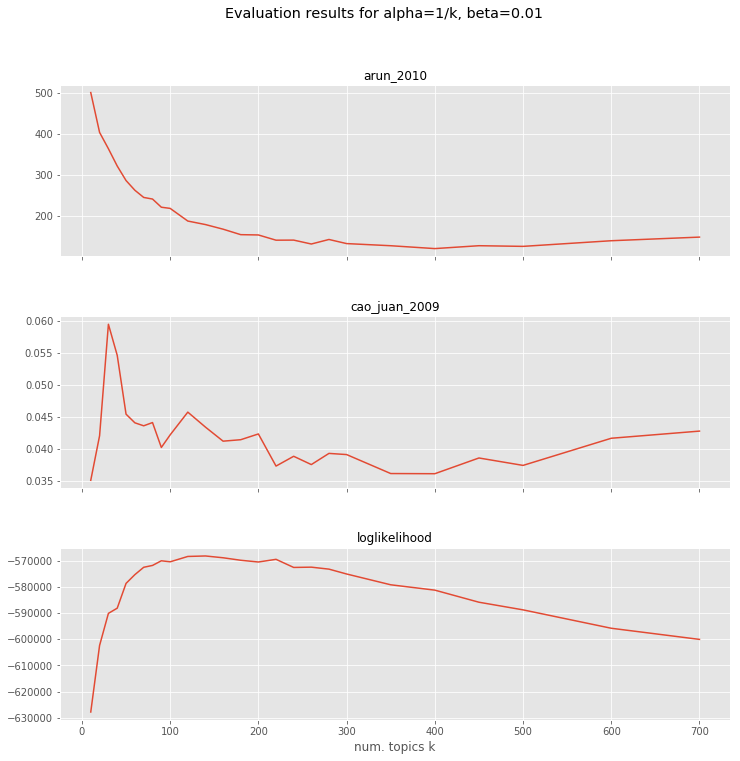

In [18]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.01', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [31]:
results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
logTopics=logScore=-999999
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("arun: %s \t %s" % (arunScore, arunTopics))
print("cao : %s \t %s" % (caoScore, caoTopics))
print("log : %s \t %s" % (logScore, logTopics))

arun: 121.53508714419367 	 400
cao : 0.0351247710189611 	 10
log : -568122.7242806089 	 140


### alpha: 1/k beta: 0,1

In [19]:
const_params = dict(n_iter=2000, eta=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

eval_results2 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 10
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 100
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 70
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_topics: 120
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 160
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_topics: 80
INFO:lda:n_wor

INFO:lda:<0> log likelihood: -1354619
INFO:lda:<10> log likelihood: -747046
INFO:lda:<30> log likelihood: -640596
INFO:lda:<20> log likelihood: -669594
INFO:lda:<0> log likelihood: -1372141
INFO:lda:<20> log likelihood: -650863
INFO:lda:<40> log likelihood: -637724
INFO:lda:<10> log likelihood: -780870
INFO:lda:<30> log likelihood: -637324
INFO:lda:<30> log likelihood: -637902
INFO:lda:<50> log likelihood: -637206
INFO:lda:<30> log likelihood: -650446
INFO:lda:<10> log likelihood: -740889
INFO:lda:<10> log likelihood: -758232
INFO:lda:<60> log likelihood: -635185
INFO:lda:<40> log likelihood: -631373
INFO:lda:<40> log likelihood: -630709
INFO:lda:<70> log likelihood: -634015
INFO:lda:<0> log likelihood: -1413367
INFO:lda:<20> log likelihood: -683654
INFO:lda:<50> log likelihood: -629864
INFO:lda:<40> log likelihood: -638971
INFO:lda:<20> log likelihood: -680425
INFO:lda:<80> log likelihood: -633089
INFO:lda:<10> log likelihood: -764983
INFO:lda:<50> log likelihood: -628525
INFO:lda:<60

INFO:lda:<40> log likelihood: -711218
INFO:lda:<80> log likelihood: -652508
INFO:lda:<260> log likelihood: -619336
INFO:lda:<200> log likelihood: -621197
INFO:lda:<510> log likelihood: -630222
INFO:lda:<140> log likelihood: -626444
INFO:lda:<360> log likelihood: -623805
INFO:lda:<170> log likelihood: -624640
INFO:lda:<520> log likelihood: -630124
INFO:lda:<270> log likelihood: -619645
INFO:lda:<120> log likelihood: -632464
INFO:lda:<370> log likelihood: -623453
INFO:lda:<530> log likelihood: -630193
INFO:lda:<210> log likelihood: -621203
INFO:lda:<100> log likelihood: -637753
INFO:lda:<90> log likelihood: -642842
INFO:lda:<540> log likelihood: -630194
INFO:lda:<280> log likelihood: -619474
INFO:lda:<380> log likelihood: -623581
INFO:lda:<60> log likelihood: -669833
INFO:lda:<180> log likelihood: -624492
INFO:lda:<550> log likelihood: -630062
INFO:lda:<150> log likelihood: -625902
INFO:lda:<220> log likelihood: -621090
INFO:lda:<390> log likelihood: -623611
INFO:lda:<290> log likelihood

INFO:lda:<380> log likelihood: -619859
INFO:lda:<1010> log likelihood: -629755
INFO:lda:<70> log likelihood: -690656
INFO:lda:<1020> log likelihood: -629915
INFO:lda:<170> log likelihood: -633660
INFO:lda:<490> log likelihood: -618285
INFO:lda:<680> log likelihood: -623457
INFO:lda:<1030> log likelihood: -630127
INFO:lda:<320> log likelihood: -621323
INFO:lda:<270> log likelihood: -624372
INFO:lda:<390> log likelihood: -619554
INFO:lda:<80> log likelihood: -683770
INFO:lda:<1040> log likelihood: -629749
INFO:lda:<690> log likelihood: -623028
INFO:lda:<500> log likelihood: -618852
INFO:lda:<220> log likelihood: -626131
INFO:lda:<190> log likelihood: -630798
INFO:lda:<1050> log likelihood: -630229
INFO:lda:<90> log likelihood: -671256
INFO:lda:<120> log likelihood: -652316
INFO:lda:<700> log likelihood: -623054
INFO:lda:<400> log likelihood: -619151
INFO:lda:<160> log likelihood: -639519
INFO:lda:<330> log likelihood: -621769
INFO:lda:<1060> log likelihood: -630180
INFO:lda:<510> log lik

INFO:lda:<1000> log likelihood: -622118
INFO:lda:<150> log likelihood: -654765
INFO:lda:<560> log likelihood: -619742
INFO:lda:<390> log likelihood: -623005
INFO:lda:<720> log likelihood: -618114
INFO:lda:<1520> log likelihood: -629823
INFO:lda:<320> log likelihood: -625192
INFO:lda:<1010> log likelihood: -621077
INFO:lda:<270> log likelihood: -628810
INFO:lda:<1530> log likelihood: -630252
INFO:lda:<130> log likelihood: -662402
INFO:lda:<1020> log likelihood: -620860
INFO:lda:<570> log likelihood: -620043
INFO:lda:<1540> log likelihood: -629669
INFO:lda:<470> log likelihood: -620985
INFO:lda:<730> log likelihood: -618593
INFO:lda:<250> log likelihood: -630364
INFO:lda:<1030> log likelihood: -621469
INFO:lda:<1550> log likelihood: -629795
INFO:lda:<400> log likelihood: -622484
INFO:lda:<1560> log likelihood: -630351
INFO:lda:<1040> log likelihood: -621024
INFO:lda:<580> log likelihood: -619969
INFO:lda:<740> log likelihood: -617954
INFO:lda:<1570> log likelihood: -630137
INFO:lda:<330>

INFO:tmtoolkit:> evaluation result with metric "arun_2010": 508.575476
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.004166666666666667, 'eta': 0.1, 'n_topics': 240, 'n_iter': 2000}
INFO:lda:<420> log likelihood: -624306
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_topics: 240
INFO:lda:n_iter: 2000
INFO:lda:<600> log likelihood: -620575
INFO:lda:<950> log likelihood: -617716
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<330> log likelihood: -629589
INFO:lda:<740> log likelihood: -619106
INFO:lda:<120> log likelihood: -681397
INFO:lda:<230> log likelihood: -643533
INFO:lda:<510> log likelihood: -622651
INFO:lda:<960> log 

INFO:lda:<960> log likelihood: -619443
INFO:lda:<300> log likelihood: -641888
INFO:lda:<1220> log likelihood: -617742
INFO:lda:<540> log likelihood: -623791
INFO:lda:<1730> log likelihood: -620958
INFO:lda:<250> log likelihood: -647090
INFO:lda:<650> log likelihood: -622232
INFO:lda:<430> log likelihood: -629128
INFO:lda:<970> log likelihood: -619124
INFO:lda:<1740> log likelihood: -620751
INFO:lda:<1230> log likelihood: -617389
INFO:lda:<770> log likelihood: -620719
INFO:lda:<190> log likelihood: -663901
INFO:lda:<1750> log likelihood: -620097
INFO:lda:<470> log likelihood: -626723
INFO:lda:<380> log likelihood: -633083
INFO:lda:<1240> log likelihood: -617797
INFO:lda:<1760> log likelihood: -620556
INFO:lda:<980> log likelihood: -619145
INFO:lda:<660> log likelihood: -622412
INFO:lda:<780> log likelihood: -620794
INFO:lda:<550> log likelihood: -623512
INFO:lda:<1770> log likelihood: -620531
INFO:lda:<1250> log likelihood: -617249
INFO:lda:<990> log likelihood: -619306
INFO:lda:<220> l

INFO:lda:<230> log likelihood: -659972
INFO:lda:<790> log likelihood: -621628
INFO:lda:<580> log likelihood: -626163
INFO:lda:<1190> log likelihood: -618699
INFO:lda:<460> log likelihood: -631453
INFO:lda:<1500> log likelihood: -617568
INFO:lda:<930> log likelihood: -620312
INFO:lda:<670> log likelihood: -623720
INFO:lda:<800> log likelihood: -621581
INFO:lda:<1200> log likelihood: -618220
INFO:lda:<1510> log likelihood: -617501
INFO:lda:<530> log likelihood: -628809
INFO:lda:<940> log likelihood: -620827
INFO:lda:<190> log likelihood: -672118
INFO:lda:<320> log likelihood: -644475
INFO:lda:<1520> log likelihood: -617061
INFO:lda:<380> log likelihood: -639417
INFO:lda:<1210> log likelihood: -618342
INFO:lda:<470> log likelihood: -631679
INFO:lda:<590> log likelihood: -626263
INFO:lda:<1530> log likelihood: -617458
INFO:lda:<680> log likelihood: -623372
INFO:lda:<210> log likelihood: -664315
INFO:lda:<950> log likelihood: -620162
INFO:lda:<810> log likelihood: -622603
INFO:lda:<1220> lo

INFO:lda:<650> log likelihood: -628762
INFO:lda:<330> log likelihood: -651511
INFO:lda:<720> log likelihood: -625698
INFO:lda:<390> log likelihood: -643316
INFO:lda:<830> log likelihood: -623692
INFO:lda:<990> log likelihood: -621990
INFO:lda:<1160> log likelihood: -620376
INFO:lda:<1870> log likelihood: -617372
INFO:lda:<1490> log likelihood: -618821
INFO:lda:<90> log likelihood: -695917
INFO:lda:<40> log likelihood: -737900
INFO:lda:<1880> log likelihood: -617423
INFO:lda:<1500> log likelihood: -618169
INFO:lda:<1000> log likelihood: -622125
INFO:lda:<580> log likelihood: -630386
INFO:lda:<1170> log likelihood: -620017
INFO:lda:<840> log likelihood: -623507
INFO:lda:<1890> log likelihood: -616738
INFO:lda:<660> log likelihood: -628872
INFO:lda:<1510> log likelihood: -618405
INFO:lda:<730> log likelihood: -626427
INFO:lda:<470> log likelihood: -638722
INFO:lda:<1010> log likelihood: -621760
INFO:lda:<1900> log likelihood: -617443
INFO:lda:<1180> log likelihood: -620267
INFO:lda:<1520>

INFO:lda:<1370> log likelihood: -620031
INFO:lda:<1790> log likelihood: -618148
INFO:lda:<980> log likelihood: -623945
INFO:lda:<1190> log likelihood: -621733
INFO:lda:<1380> log likelihood: -620732
INFO:lda:<350> log likelihood: -655062
INFO:lda:<1800> log likelihood: -618590
INFO:lda:<780> log likelihood: -627962
INFO:lda:<130> log likelihood: -685099
INFO:lda:<1810> log likelihood: -618688
INFO:lda:<690> log likelihood: -630241
INFO:lda:<860> log likelihood: -625468
INFO:lda:<1390> log likelihood: -620476
INFO:lda:<1200> log likelihood: -620934
INFO:lda:<990> log likelihood: -623392
INFO:lda:<80> log likelihood: -705798
INFO:lda:<280> log likelihood: -665784
INFO:lda:<400> log likelihood: -649247
INFO:lda:<1820> log likelihood: -618799
INFO:lda:<1400> log likelihood: -620135
INFO:lda:<470> log likelihood: -643084
INFO:lda:<560> log likelihood: -637341
INFO:lda:<1210> log likelihood: -621878
INFO:lda:<870> log likelihood: -625597
INFO:lda:<790> log likelihood: -628355
INFO:lda:<310> 

INFO:lda:<1630> log likelihood: -619669
INFO:lda:<1010> log likelihood: -625841
INFO:lda:<550> log likelihood: -642744
INFO:lda:<1410> log likelihood: -622227
INFO:lda:<1640> log likelihood: -619712
INFO:lda:<470> log likelihood: -647689
INFO:lda:<1160> log likelihood: -623608
INFO:lda:<820> log likelihood: -630563
INFO:lda:<920> log likelihood: -627751
INFO:lda:<120> log likelihood: -690836
INFO:lda:<650> log likelihood: -636518
INFO:lda:<1020> log likelihood: -625335
INFO:lda:<330> log likelihood: -663611
INFO:lda:<1420> log likelihood: -622088
INFO:lda:<1650> log likelihood: -619637
INFO:lda:<1170> log likelihood: -623088
INFO:lda:<370> log likelihood: -657354
INFO:lda:<1430> log likelihood: -621851
INFO:lda:<930> log likelihood: -628301
INFO:lda:<830> log likelihood: -630410
INFO:lda:<420> log likelihood: -653601
INFO:lda:<1660> log likelihood: -620184
INFO:lda:<560> log likelihood: -642779
INFO:lda:<10> log likelihood: -852818
INFO:lda:<1030> log likelihood: -624887
INFO:lda:<1180

INFO:lda:<390> log likelihood: -661845
INFO:lda:<1200> log likelihood: -625234
INFO:lda:<770> log likelihood: -636662
INFO:lda:<660> log likelihood: -642229
INFO:lda:<490> log likelihood: -652562
INFO:lda:<1960> log likelihood: -619405
INFO:lda:<1700> log likelihood: -621322
INFO:lda:<100> log likelihood: -701139
INFO:lda:<970> log likelihood: -629890
INFO:lda:<1390> log likelihood: -623344
INFO:lda:<560> log likelihood: -646231
INFO:lda:<170> log likelihood: -681597
INFO:lda:<1090> log likelihood: -627866
INFO:lda:<1970> log likelihood: -619673
INFO:lda:<1210> log likelihood: -625620
INFO:lda:<1710> log likelihood: -621149
INFO:lda:<1400> log likelihood: -623216
INFO:lda:<1980> log likelihood: -619675
INFO:lda:<780> log likelihood: -636932
INFO:lda:<1720> log likelihood: -622307
INFO:lda:<440> log likelihood: -656315
INFO:lda:<670> log likelihood: -641719
INFO:lda:<980> log likelihood: -630655
INFO:lda:<1220> log likelihood: -625807
INFO:lda:<1100> log likelihood: -628266
INFO:lda:<19

INFO:lda:<1120> log likelihood: -629689
INFO:lda:<1390> log likelihood: -625008
INFO:lda:<760> log likelihood: -641994
INFO:lda:<1620> log likelihood: -622385
INFO:lda:<1990> log likelihood: -620778
INFO:lda:<220> log likelihood: -676708
INFO:lda:<650> log likelihood: -646236
INFO:lda:<1400> log likelihood: -625229
INFO:lda:<570> log likelihood: -650592
INFO:lda:<1270> log likelihood: -627448
INFO:lda:<1999> log likelihood: -621429
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -620777.636375
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.052918
INFO:lda:<1130> log likelihood: -629623
INFO:lda:<1630> log likelihood: -622945
INFO:lda:<910> log likelihood: -636674
INFO:lda:<290> log likelihood: -668193
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 318.746316
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.0025, 'eta': 0.1, 'n_topics': 400, 'n_iter': 2000}
INFO:lda:n_do

INFO:lda:<280> log likelihood: -672937
INFO:lda:<1300> log likelihood: -630140
INFO:lda:<1460> log likelihood: -627654
INFO:lda:<70> log likelihood: -731276
INFO:lda:<1640> log likelihood: -625473
INFO:lda:<1890> log likelihood: -622880
INFO:lda:<1060> log likelihood: -636506
INFO:lda:<150> log likelihood: -696214
INFO:lda:<890> log likelihood: -641587
INFO:lda:<530> log likelihood: -658597
INFO:lda:<660> log likelihood: -650187
INFO:lda:<1900> log likelihood: -622651
INFO:lda:<760> log likelihood: -645828
INFO:lda:<1310> log likelihood: -629326
INFO:lda:<1650> log likelihood: -624546
INFO:lda:<1470> log likelihood: -627951
INFO:lda:<590> log likelihood: -654738
INFO:lda:<1910> log likelihood: -622623
INFO:lda:<1480> log likelihood: -628088
INFO:lda:<1660> log likelihood: -624859
INFO:lda:<1070> log likelihood: -636492
INFO:lda:<210> log likelihood: -682532
INFO:lda:<1320> log likelihood: -629760
INFO:lda:<360> log likelihood: -664981
INFO:lda:<900> log likelihood: -642019
INFO:lda:<19

INFO:lda:<1890> log likelihood: -625085
INFO:lda:<20> log likelihood: -823986
INFO:lda:<1690> log likelihood: -627549
INFO:lda:<1210> log likelihood: -636895
INFO:lda:<1900> log likelihood: -625167
INFO:lda:<80> log likelihood: -735392
INFO:lda:<760> log likelihood: -649489
INFO:lda:<1510> log likelihood: -629786
INFO:lda:<610> log likelihood: -657770
INFO:lda:<120> log likelihood: -711173
INFO:lda:<1030> log likelihood: -640488
INFO:lda:<1700> log likelihood: -628072
INFO:lda:<1910> log likelihood: -625026
INFO:lda:<880> log likelihood: -644962
INFO:lda:<210> log likelihood: -687267
INFO:lda:<350> log likelihood: -668732
INFO:lda:<680> log likelihood: -653716
INFO:lda:<1520> log likelihood: -629537
INFO:lda:<1220> log likelihood: -636642
INFO:lda:<270> log likelihood: -677602
INFO:lda:<1920> log likelihood: -625003
INFO:lda:<430> log likelihood: -661858
INFO:lda:<1710> log likelihood: -626975
INFO:lda:<1040> log likelihood: -640567
INFO:lda:<770> log likelihood: -649483
INFO:lda:<1530

INFO:lda:<1940> log likelihood: -627445
INFO:lda:<1390> log likelihood: -636515
INFO:lda:<1730> log likelihood: -630050
INFO:lda:<700> log likelihood: -657218
INFO:lda:<130> log likelihood: -716809
INFO:lda:<510> log likelihood: -660559
INFO:lda:<1950> log likelihood: -627415
INFO:lda:<880> log likelihood: -648722
INFO:lda:<1740> log likelihood: -630456
INFO:lda:<1400> log likelihood: -636031
INFO:lda:<1190> log likelihood: -640280
INFO:lda:<340> log likelihood: -673135
INFO:lda:<1960> log likelihood: -627661
INFO:lda:<1010> log likelihood: -645249
INFO:lda:<780> log likelihood: -652988
INFO:lda:<180> log likelihood: -700251
INFO:lda:<1750> log likelihood: -629610
INFO:lda:<1410> log likelihood: -636660
INFO:lda:<1200> log likelihood: -640536
INFO:lda:<1970> log likelihood: -627410
INFO:lda:<430> log likelihood: -666396
INFO:lda:<710> log likelihood: -657245
INFO:lda:<890> log likelihood: -649180
INFO:lda:<1760> log likelihood: -629716
INFO:lda:<280> log likelihood: -679747
INFO:lda:<7

INFO:lda:<1610> log likelihood: -636232
INFO:lda:<420> log likelihood: -670117
INFO:lda:<1999> log likelihood: -629843
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -629137.793134
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.061602
INFO:lda:<350> log likelihood: -674939
INFO:lda:<610> log likelihood: -659922
INFO:lda:<810> log likelihood: -657208
INFO:lda:<900> log likelihood: -652252
INFO:lda:<1370> log likelihood: -639476
INFO:lda:<1020> log likelihood: -648696
INFO:lda:<1160> log likelihood: -644698
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 293.917443
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.0014285714285714286, 'eta': 0.1, 'n_topics': 700, 'n_iter': 2000}
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_topics: 700
INFO:lda:n_iter: 2000
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Co

INFO:lda:<260> log likelihood: -698312
INFO:lda:<440> log likelihood: -672778
INFO:lda:<720> log likelihood: -658684
INFO:lda:<1040> log likelihood: -652867
INFO:lda:<520> log likelihood: -668279
INFO:lda:<1580> log likelihood: -639596
INFO:lda:<940> log likelihood: -655854
INFO:lda:<1180> log likelihood: -647441
INFO:lda:<1880> log likelihood: -636497
INFO:lda:<1340> log likelihood: -645161
INFO:lda:<1050> log likelihood: -651885
INFO:lda:<1890> log likelihood: -636947
INFO:lda:<1590> log likelihood: -640084
INFO:lda:<730> log likelihood: -659176
INFO:lda:<1190> log likelihood: -647219
INFO:lda:<630> log likelihood: -664375
INFO:lda:<330> log likelihood: -686779
INFO:lda:<1350> log likelihood: -644457
INFO:lda:<180> log likelihood: -713528
INFO:lda:<950> log likelihood: -654953
INFO:lda:<1900> log likelihood: -636377
INFO:lda:<450> log likelihood: -673365
INFO:lda:<130> log likelihood: -731325
INFO:lda:<1600> log likelihood: -640503
INFO:lda:<40> log likelihood: -812929
INFO:lda:<530>

INFO:lda:<1210> log likelihood: -651683
INFO:lda:<860> log likelihood: -658136
INFO:lda:<1840> log likelihood: -639083
INFO:lda:<1090> log likelihood: -655322
INFO:lda:<1370> log likelihood: -647388
INFO:lda:<190> log likelihood: -719621
INFO:lda:<550> log likelihood: -670135
INFO:lda:<250> log likelihood: -703778
INFO:lda:<1560> log likelihood: -644685
INFO:lda:<1220> log likelihood: -651083
INFO:lda:<750> log likelihood: -662945
INFO:lda:<1850> log likelihood: -638918
INFO:lda:<420> log likelihood: -682162
INFO:lda:<1380> log likelihood: -647842
INFO:lda:<1100> log likelihood: -654729
INFO:lda:<1570> log likelihood: -644915
INFO:lda:<640> log likelihood: -665804
INFO:lda:<350> log likelihood: -690755
INFO:lda:<870> log likelihood: -657753
INFO:lda:<1860> log likelihood: -639157
INFO:lda:<130> log likelihood: -742854
INFO:lda:<560> log likelihood: -669766
INFO:lda:<1230> log likelihood: -651577
INFO:lda:<1390> log likelihood: -647642
INFO:lda:<1580> log likelihood: -644451
INFO:lda:<1

INFO:lda:<760> log likelihood: -664465
INFO:lda:<1800> log likelihood: -644692
INFO:lda:<1260> log likelihood: -654914
INFO:lda:<520> log likelihood: -678203
INFO:lda:<1590> log likelihood: -647463
INFO:lda:<1020> log likelihood: -657621
INFO:lda:<890> log likelihood: -662370
INFO:lda:<440> log likelihood: -686771
INFO:lda:<1410> log likelihood: -651448
INFO:lda:<1810> log likelihood: -644682
INFO:lda:<680> log likelihood: -669193
INFO:lda:<1600> log likelihood: -647353
INFO:lda:<770> log likelihood: -665505
INFO:lda:<1270> log likelihood: -654826
INFO:lda:<190> log likelihood: -730475
INFO:lda:<270> log likelihood: -710042
INFO:lda:<1820> log likelihood: -645240
INFO:lda:<1030> log likelihood: -657664
INFO:lda:<900> log likelihood: -662392
INFO:lda:<1420> log likelihood: -650635
INFO:lda:<340> log likelihood: -696642
INFO:lda:<530> log likelihood: -677819
INFO:lda:<1610> log likelihood: -647660
INFO:lda:<1280> log likelihood: -655424
INFO:lda:<1830> log likelihood: -644084
INFO:lda:<6

INFO:lda:<1190> log likelihood: -658084
INFO:lda:<910> log likelihood: -663611
INFO:lda:<1620> log likelihood: -650928
INFO:lda:<350> log likelihood: -702683
INFO:lda:<1840> log likelihood: -647927
INFO:lda:<640> log likelihood: -676003
INFO:lda:<1050> log likelihood: -661543
INFO:lda:<1460> log likelihood: -654811
INFO:lda:<1200> log likelihood: -657058
INFO:lda:<1630> log likelihood: -650960
INFO:lda:<820> log likelihood: -667975
INFO:lda:<1850> log likelihood: -648084
INFO:lda:<550> log likelihood: -682871
INFO:lda:<430> log likelihood: -692114
INFO:lda:<920> log likelihood: -664203
INFO:lda:<260> log likelihood: -720483
INFO:lda:<1470> log likelihood: -654744
INFO:lda:<1640> log likelihood: -650846
INFO:lda:<1060> log likelihood: -662168
INFO:lda:<1860> log likelihood: -647017
INFO:lda:<650> log likelihood: -675437
INFO:lda:<1210> log likelihood: -657430
INFO:lda:<200> log likelihood: -737847
INFO:lda:<360> log likelihood: -702660
INFO:lda:<830> log likelihood: -667377
INFO:lda:<93

INFO:lda:<450> log likelihood: -697075
INFO:lda:<1400> log likelihood: -657656
INFO:lda:<670> log likelihood: -680316
INFO:lda:<980> log likelihood: -666287
INFO:lda:<1090> log likelihood: -663308
INFO:lda:<1880> log likelihood: -650122
INFO:lda:<1240> log likelihood: -661394
INFO:lda:<1690> log likelihood: -655504
INFO:lda:<1410> log likelihood: -657169
INFO:lda:<780> log likelihood: -674919
INFO:lda:<340> log likelihood: -712887
INFO:lda:<540> log likelihood: -688182
INFO:lda:<1890> log likelihood: -650694
INFO:lda:<990> log likelihood: -666599
INFO:lda:<1100> log likelihood: -663513
INFO:lda:<1700> log likelihood: -655460
INFO:lda:<680> log likelihood: -680832
INFO:lda:<460> log likelihood: -696716
INFO:lda:<1250> log likelihood: -661454
INFO:lda:<1420> log likelihood: -656826
INFO:lda:<1900> log likelihood: -651033
INFO:lda:<270> log likelihood: -729037
INFO:lda:<1710> log likelihood: -655573
INFO:lda:<790> log likelihood: -674334
INFO:lda:<1000> log likelihood: -666267
INFO:lda:<5

INFO:lda:<1950> log likelihood: -654498
INFO:lda:<940> log likelihood: -673935
INFO:lda:<570> log likelihood: -691288
INFO:lda:<1460> log likelihood: -660707
INFO:lda:<1650> log likelihood: -657151
INFO:lda:<670> log likelihood: -684982
INFO:lda:<1300> log likelihood: -662968
INFO:lda:<1960> log likelihood: -654042
INFO:lda:<1180> log likelihood: -666098
INFO:lda:<440> log likelihood: -705135
INFO:lda:<830> log likelihood: -677353
INFO:lda:<950> log likelihood: -673629
INFO:lda:<1660> log likelihood: -657053
INFO:lda:<1470> log likelihood: -659520
INFO:lda:<350> log likelihood: -720893
INFO:lda:<1970> log likelihood: -654215
INFO:lda:<1310> log likelihood: -662234
INFO:lda:<580> log likelihood: -691433
INFO:lda:<1190> log likelihood: -666332
INFO:lda:<680> log likelihood: -685455
INFO:lda:<1670> log likelihood: -657181
INFO:lda:<1980> log likelihood: -654759
INFO:lda:<1480> log likelihood: -659276
INFO:lda:<840> log likelihood: -677301
INFO:lda:<960> log likelihood: -672696
INFO:lda:<1

INFO:lda:<1140> log likelihood: -672410
INFO:lda:<1410> log likelihood: -664922
INFO:lda:<1950> log likelihood: -656340
INFO:lda:<1730> log likelihood: -658624
INFO:lda:<830> log likelihood: -683000
INFO:lda:<1550> log likelihood: -662597
INFO:lda:<1150> log likelihood: -673039
INFO:lda:<1010> log likelihood: -676867
INFO:lda:<450> log likelihood: -715176
INFO:lda:<720> log likelihood: -687430
INFO:lda:<560> log likelihood: -700009
INFO:lda:<1960> log likelihood: -656947
INFO:lda:<1740> log likelihood: -659329
INFO:lda:<1420> log likelihood: -665252
INFO:lda:<1560> log likelihood: -663050
INFO:lda:<1970> log likelihood: -656779
INFO:lda:<840> log likelihood: -682850
INFO:lda:<1160> log likelihood: -672374
INFO:lda:<1750> log likelihood: -659049
INFO:lda:<1020> log likelihood: -676301
INFO:lda:<1570> log likelihood: -661609
INFO:lda:<1430> log likelihood: -664475
INFO:lda:<730> log likelihood: -687905
INFO:lda:<1980> log likelihood: -656454
INFO:lda:<1760> log likelihood: -659657
INFO:l

INFO:lda:<1380> log likelihood: -671376
INFO:lda:<690> log likelihood: -696419
INFO:lda:<1680> log likelihood: -664005
INFO:lda:<1840> log likelihood: -661592
INFO:lda:<1220> log likelihood: -676366
INFO:lda:<1690> log likelihood: -664599
INFO:lda:<1390> log likelihood: -671313
INFO:lda:<1850> log likelihood: -661371
INFO:lda:<1020> log likelihood: -680490
INFO:lda:<890> log likelihood: -683855
INFO:lda:<700> log likelihood: -697480
INFO:lda:<570> log likelihood: -710319
INFO:lda:<1230> log likelihood: -675818
INFO:lda:<1700> log likelihood: -664069
INFO:lda:<1860> log likelihood: -661503
INFO:lda:<1400> log likelihood: -671766
INFO:lda:<1030> log likelihood: -681526
INFO:lda:<1870> log likelihood: -660669
INFO:lda:<1710> log likelihood: -664615
INFO:lda:<900> log likelihood: -684925
INFO:lda:<1240> log likelihood: -675791
INFO:lda:<1410> log likelihood: -670059
INFO:lda:<710> log likelihood: -696337
INFO:lda:<1880> log likelihood: -661394
INFO:lda:<1720> log likelihood: -664828
INFO:l

INFO:lda:<880> log likelihood: -693543
INFO:lda:<1270> log likelihood: -679892
INFO:lda:<1510> log likelihood: -674191
INFO:lda:<1710> log likelihood: -670175
INFO:lda:<1120> log likelihood: -683238
INFO:lda:<1280> log likelihood: -679666
INFO:lda:<1520> log likelihood: -674541
INFO:lda:<1720> log likelihood: -669781
INFO:lda:<730> log likelihood: -705580
INFO:lda:<890> log likelihood: -693019
INFO:lda:<1730> log likelihood: -669392
INFO:lda:<1530> log likelihood: -674445
INFO:lda:<1290> log likelihood: -679344
INFO:lda:<1130> log likelihood: -683192
INFO:lda:<1740> log likelihood: -670654
INFO:lda:<900> log likelihood: -693097
INFO:lda:<1540> log likelihood: -674873
INFO:lda:<740> log likelihood: -705193
INFO:lda:<1300> log likelihood: -679946
INFO:lda:<1140> log likelihood: -683327
INFO:lda:<1750> log likelihood: -669313
INFO:lda:<1550> log likelihood: -674937
INFO:lda:<1310> log likelihood: -679036
INFO:lda:<910> log likelihood: -693596
INFO:lda:<1760> log likelihood: -669979
INFO:l

INFO:lda:<1660> log likelihood: -678442
INFO:lda:<1460> log likelihood: -683056
INFO:lda:<1170> log likelihood: -689738
INFO:lda:<1960> log likelihood: -673705
INFO:lda:<970> log likelihood: -700984
INFO:lda:<1670> log likelihood: -678153
INFO:lda:<1470> log likelihood: -681944
INFO:lda:<1970> log likelihood: -674260
INFO:lda:<1180> log likelihood: -690124
INFO:lda:<1680> log likelihood: -676746
INFO:lda:<980> log likelihood: -700723
INFO:lda:<1980> log likelihood: -674148
INFO:lda:<1480> log likelihood: -682404
INFO:lda:<1690> log likelihood: -678126
INFO:lda:<1190> log likelihood: -689854
INFO:lda:<1990> log likelihood: -674372
INFO:lda:<1490> log likelihood: -682607
INFO:lda:<1700> log likelihood: -677821
INFO:lda:<990> log likelihood: -700843
INFO:lda:<1999> log likelihood: -673981
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -674371.867685
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.210676
INFO:lda:<1200> log likelihood: -689799
INFO:lda:<1

INFO:lda:<1400> log likelihood: -696070
INFO:lda:<1680> log likelihood: -686354
INFO:lda:<1690> log likelihood: -686336
INFO:lda:<1410> log likelihood: -695732
INFO:lda:<1700> log likelihood: -686774
INFO:lda:<1420> log likelihood: -695706
INFO:lda:<1710> log likelihood: -686886
INFO:lda:<1430> log likelihood: -695714
INFO:lda:<1720> log likelihood: -686532
INFO:lda:<1440> log likelihood: -695554
INFO:lda:<1730> log likelihood: -686939
INFO:lda:<1450> log likelihood: -696211
INFO:lda:<1740> log likelihood: -687190
INFO:lda:<1460> log likelihood: -696345
INFO:lda:<1750> log likelihood: -686810
INFO:lda:<1760> log likelihood: -685805
INFO:lda:<1470> log likelihood: -695308
INFO:lda:<1770> log likelihood: -687098
INFO:lda:<1480> log likelihood: -695811
INFO:lda:<1780> log likelihood: -686573
INFO:lda:<1490> log likelihood: -695228
INFO:lda:<1790> log likelihood: -687402
INFO:lda:<1500> log likelihood: -695626
INFO:lda:<1800> log likelihood: -686317
INFO:lda:<1510> log likelihood: -694257


plotting evaluation results


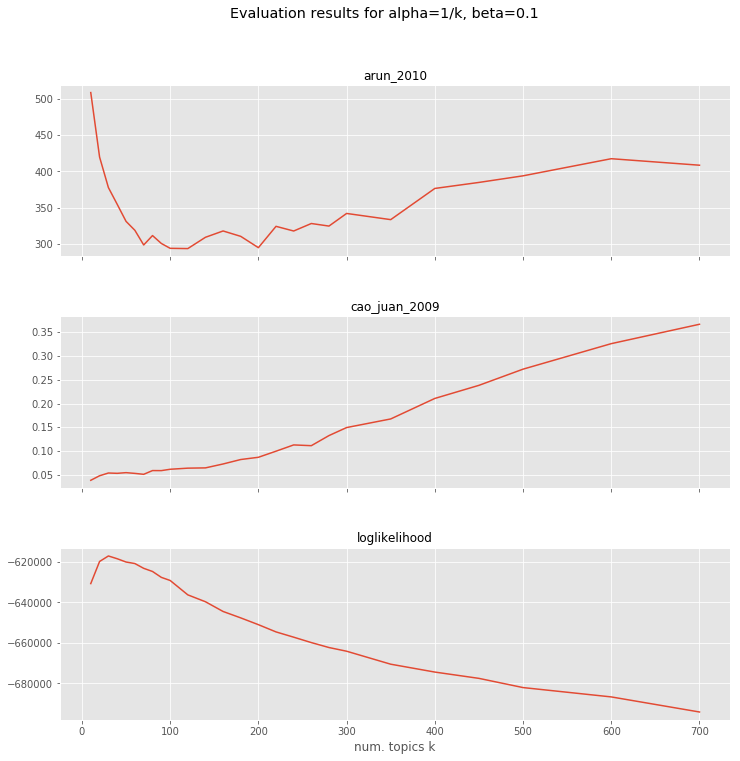

In [20]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=0.1', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [32]:
results_by_n_topics = results_by_parameter(eval_results2, 'n_topics')
logTopics=logScore=-999999
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("arun: %s \t %s" % (arunScore, arunTopics))
print("cao : %s \t %s" % (caoScore, caoTopics))
print("log : %s \t %s" % (logScore, logTopics))

arun: 293.5466503593639 	 120
cao : 0.03838582115437979 	 10
log : -617033.6248521407 	 30


### alpha: 0.1 beta: 1/(10*k)

In [22]:
const_params = dict(n_iter=2000, alpha=0.1)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, eta=1.0/(10*k)) for k in ks]

eval_results3 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_topics: 20
INFO:lda:n_words: 104073
INFO:lda:n_topics: 120
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 140
INFO:lda:n_words: 104073
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 90
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_topics: 100
INFO:lda:vocab_size: 6671
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000

INFO:lda:<0> log likelihood: -1416242
INFO:lda:<0> log likelihood: -1396602
INFO:lda:<10> log likelihood: -714932
INFO:lda:<10> log likelihood: -698399
INFO:lda:<10> log likelihood: -685374
INFO:lda:<50> log likelihood: -636141
INFO:lda:<60> log likelihood: -635000
INFO:lda:<10> log likelihood: -701635
INFO:lda:<20> log likelihood: -667443
INFO:lda:<20> log likelihood: -651203
INFO:lda:<10> log likelihood: -724334
INFO:lda:<20> log likelihood: -661569
INFO:lda:<70> log likelihood: -633534
INFO:lda:<80> log likelihood: -632669
INFO:lda:<30> log likelihood: -642305
INFO:lda:<20> log likelihood: -674007
INFO:lda:<20> log likelihood: -666017
INFO:lda:<10> log likelihood: -716336
INFO:lda:<90> log likelihood: -632217
INFO:lda:<30> log likelihood: -649755
INFO:lda:<40> log likelihood: -637812
INFO:lda:<30> log likelihood: -657351
INFO:lda:<10> log likelihood: -748739
INFO:lda:<10> log likelihood: -758763
INFO:lda:<100> log likelihood: -632324
INFO:lda:<10> log likelihood: -731012
INFO:lda:<3

INFO:lda:<330> log likelihood: -623321
INFO:lda:<570> log likelihood: -628279
INFO:lda:<100> log likelihood: -660618
INFO:lda:<40> log likelihood: -724635
INFO:lda:<580> log likelihood: -628656
INFO:lda:<110> log likelihood: -650605
INFO:lda:<250> log likelihood: -626089
INFO:lda:<160> log likelihood: -633780
INFO:lda:<340> log likelihood: -623479
INFO:lda:<200> log likelihood: -630086
INFO:lda:<590> log likelihood: -628864
INFO:lda:<350> log likelihood: -623436
INFO:lda:<80> log likelihood: -669317
INFO:lda:<600> log likelihood: -628660
INFO:lda:<140> log likelihood: -641240
INFO:lda:<260> log likelihood: -625863
INFO:lda:<80> log likelihood: -672660
INFO:lda:<610> log likelihood: -628367
INFO:lda:<210> log likelihood: -629514
INFO:lda:<360> log likelihood: -622838
INFO:lda:<110> log likelihood: -658764
INFO:lda:<620> log likelihood: -628373
INFO:lda:<170> log likelihood: -632978
INFO:lda:<120> log likelihood: -649738
INFO:lda:<370> log likelihood: -623440
INFO:lda:<270> log likelihoo

INFO:lda:<470> log likelihood: -623970
INFO:lda:<380> log likelihood: -626427
INFO:lda:<1090> log likelihood: -628348
INFO:lda:<220> log likelihood: -643496
INFO:lda:<650> log likelihood: -622165
INFO:lda:<1100> log likelihood: -627786
INFO:lda:<480> log likelihood: -623807
INFO:lda:<1110> log likelihood: -628006
INFO:lda:<80> log likelihood: -713477
INFO:lda:<390> log likelihood: -626515
INFO:lda:<310> log likelihood: -629064
INFO:lda:<160> log likelihood: -660267
INFO:lda:<660> log likelihood: -622363
INFO:lda:<200> log likelihood: -651056
INFO:lda:<1120> log likelihood: -628067
INFO:lda:<120> log likelihood: -678250
INFO:lda:<260> log likelihood: -634365
INFO:lda:<1130> log likelihood: -628244
INFO:lda:<90> log likelihood: -704938
INFO:lda:<670> log likelihood: -622713
INFO:lda:<490> log likelihood: -623857
INFO:lda:<1140> log likelihood: -628125
INFO:lda:<400> log likelihood: -626470
INFO:lda:<320> log likelihood: -628863
INFO:lda:<1150> log likelihood: -627893
INFO:lda:<230> log l

INFO:lda:<150> log likelihood: -685808
INFO:lda:<700> log likelihood: -623351
INFO:lda:<320> log likelihood: -639902
INFO:lda:<970> log likelihood: -621481
INFO:lda:<1600> log likelihood: -628201
INFO:lda:<380> log likelihood: -631817
INFO:lda:<570> log likelihood: -624937
INFO:lda:<710> log likelihood: -623499
INFO:lda:<1610> log likelihood: -627799
INFO:lda:<980> log likelihood: -621487
INFO:lda:<450> log likelihood: -627962
INFO:lda:<290> log likelihood: -647335
INFO:lda:<220> log likelihood: -660351
INFO:lda:<130> log likelihood: -698975
INFO:lda:<1620> log likelihood: -628165
INFO:lda:<990> log likelihood: -621887
INFO:lda:<720> log likelihood: -623114
INFO:lda:<100> log likelihood: -717157
INFO:lda:<1630> log likelihood: -628072
INFO:lda:<580> log likelihood: -625017
INFO:lda:<250> log likelihood: -655377
INFO:lda:<1000> log likelihood: -621122
INFO:lda:<1640> log likelihood: -627823
INFO:lda:<730> log likelihood: -623305
INFO:lda:<460> log likelihood: -627831
INFO:lda:<1010> log

INFO:lda:<730> log likelihood: -624560
INFO:lda:<920> log likelihood: -623380
INFO:lda:<370> log likelihood: -645424
INFO:lda:<1270> log likelihood: -621181
INFO:lda:<930> log likelihood: -623305
INFO:lda:<120> log likelihood: -722134
INFO:lda:<740> log likelihood: -624530
INFO:lda:<580> log likelihood: -626900
INFO:lda:<1280> log likelihood: -621483
INFO:lda:<490> log likelihood: -631968
INFO:lda:<410> log likelihood: -638581
INFO:lda:<150> log likelihood: -704278
INFO:lda:<940> log likelihood: -623365
INFO:lda:<1290> log likelihood: -621467
INFO:lda:<230> log likelihood: -669076
INFO:lda:<320> log likelihood: -652886
INFO:lda:<130> log likelihood: -712936
INFO:lda:<290> log likelihood: -656902
INFO:lda:<590> log likelihood: -627689
INFO:lda:<950> log likelihood: -623273
INFO:lda:<1300> log likelihood: -621583
INFO:lda:<750> log likelihood: -624412
INFO:lda:<170> log likelihood: -694747
INFO:lda:<500> log likelihood: -631821
INFO:lda:<380> log likelihood: -645320
INFO:lda:<1310> log l

INFO:lda:<770> log likelihood: -626764
INFO:lda:<300> log likelihood: -666441
INFO:lda:<970> log likelihood: -623003
INFO:lda:<1230> log likelihood: -623247
INFO:lda:<640> log likelihood: -631081
INFO:lda:<1670> log likelihood: -621069
INFO:lda:<540> log likelihood: -637259
INFO:lda:<780> log likelihood: -626683
INFO:lda:<380> log likelihood: -655443
INFO:lda:<1240> log likelihood: -623206
INFO:lda:<1680> log likelihood: -620928
INFO:lda:<980> log likelihood: -623106
INFO:lda:<420> log likelihood: -651127
INFO:lda:<490> log likelihood: -645168
INFO:lda:<30> log likelihood: -753137
INFO:lda:<1690> log likelihood: -620846
INFO:lda:<1250> log likelihood: -622780
INFO:lda:<260> log likelihood: -679599
INFO:lda:<650> log likelihood: -631154
INFO:lda:<790> log likelihood: -626493
INFO:lda:<990> log likelihood: -623078
INFO:lda:<200> log likelihood: -701538
INFO:lda:<1700> log likelihood: -620952
INFO:lda:<1260> log likelihood: -623231
INFO:lda:<550> log likelihood: -637388
INFO:lda:<1710> lo

INFO:lda:<1510> log likelihood: -622825
INFO:lda:<240> log likelihood: -699823
INFO:lda:<950> log likelihood: -626376
INFO:lda:<310> log likelihood: -677162
INFO:lda:<1190> log likelihood: -622844
INFO:lda:<1520> log likelihood: -622865
INFO:lda:<370> log likelihood: -664699
INFO:lda:<660> log likelihood: -636681
INFO:lda:<960> log likelihood: -626337
INFO:lda:<510> log likelihood: -649627
INFO:lda:<600> log likelihood: -642954
INFO:lda:<1200> log likelihood: -622926
INFO:lda:<780> log likelihood: -630417
INFO:lda:<1530> log likelihood: -623252
INFO:lda:<460> log likelihood: -653707
INFO:lda:<1540> log likelihood: -622732
INFO:lda:<670> log likelihood: -636068
INFO:lda:<970> log likelihood: -626220
INFO:lda:<1210> log likelihood: -623432
INFO:lda:<1550> log likelihood: -622761
INFO:lda:<60> log likelihood: -739358
INFO:lda:<520> log likelihood: -649568
INFO:lda:<790> log likelihood: -630574
INFO:lda:<0> log likelihood: -1610160
INFO:lda:<610> log likelihood: -643607
INFO:lda:<210> log 

INFO:lda:<330> log likelihood: -686264
INFO:lda:<230> log likelihood: -714000
INFO:lda:<740> log likelihood: -642796
INFO:lda:<1890> log likelihood: -621981
INFO:lda:<1470> log likelihood: -622024
INFO:lda:<640> log likelihood: -648967
INFO:lda:<830> log likelihood: -635393
INFO:lda:<1900> log likelihood: -622088
INFO:lda:<300> log likelihood: -697616
INFO:lda:<1190> log likelihood: -626186
INFO:lda:<970> log likelihood: -629492
INFO:lda:<460> log likelihood: -664014
INFO:lda:<1480> log likelihood: -622043
INFO:lda:<1910> log likelihood: -622177
INFO:lda:<750> log likelihood: -642468
INFO:lda:<570> log likelihood: -651855
INFO:lda:<1920> log likelihood: -622283
INFO:lda:<1490> log likelihood: -621882
INFO:lda:<100> log likelihood: -730028
INFO:lda:<1200> log likelihood: -625687
INFO:lda:<390> log likelihood: -674444
INFO:lda:<980> log likelihood: -629806
INFO:lda:<840> log likelihood: -635313
INFO:lda:<650> log likelihood: -648894
INFO:lda:<1930> log likelihood: -622089
INFO:lda:<1500>

INFO:lda:<1760> log likelihood: -621958
INFO:lda:<1410> log likelihood: -625086
INFO:lda:<1160> log likelihood: -629124
INFO:lda:<20> log likelihood: -774448
INFO:lda:<990> log likelihood: -634789
INFO:lda:<1770> log likelihood: -621551
INFO:lda:<770> log likelihood: -647893
INFO:lda:<1420> log likelihood: -625246
INFO:lda:<890> log likelihood: -641916
INFO:lda:<1170> log likelihood: -629230
INFO:lda:<680> log likelihood: -651774
INFO:lda:<460> log likelihood: -673125
INFO:lda:<140> log likelihood: -725706
INFO:lda:<550> log likelihood: -662789
INFO:lda:<1780> log likelihood: -621034
INFO:lda:<400> log likelihood: -685305
INFO:lda:<1000> log likelihood: -634924
INFO:lda:<360> log likelihood: -695178
INFO:lda:<1430> log likelihood: -625353
INFO:lda:<1790> log likelihood: -621398
INFO:lda:<310> log likelihood: -702528
INFO:lda:<1180> log likelihood: -629182
INFO:lda:<780> log likelihood: -647564
INFO:lda:<900> log likelihood: -642300
INFO:lda:<1440> log likelihood: -625447
INFO:lda:<1800

INFO:lda:<180> log likelihood: -723160
INFO:lda:<360> log likelihood: -699759
INFO:lda:<900> log likelihood: -647491
INFO:lda:<1170> log likelihood: -634826
INFO:lda:<1040> log likelihood: -640751
INFO:lda:<1670> log likelihood: -625523
INFO:lda:<1380> log likelihood: -628574
INFO:lda:<540> log likelihood: -671738
INFO:lda:<1180> log likelihood: -634446
INFO:lda:<1680> log likelihood: -625241
INFO:lda:<650> log likelihood: -663753
INFO:lda:<810> log likelihood: -650872
INFO:lda:<910> log likelihood: -647257
INFO:lda:<1050> log likelihood: -640809
INFO:lda:<1390> log likelihood: -629564
INFO:lda:<420> log likelihood: -693248
INFO:lda:<470> log likelihood: -682453
INFO:lda:<60> log likelihood: -752157
INFO:lda:<1690> log likelihood: -625424
INFO:lda:<1190> log likelihood: -635115
INFO:lda:<1400> log likelihood: -628933
INFO:lda:<1060> log likelihood: -641275
INFO:lda:<920> log likelihood: -646773
INFO:lda:<1700> log likelihood: -625679
INFO:lda:<820> log likelihood: -650494
INFO:lda:<330

INFO:lda:<430> log likelihood: -698983
INFO:lda:<1390> log likelihood: -634736
INFO:lda:<960> log likelihood: -650139
INFO:lda:<1660> log likelihood: -628604
INFO:lda:<1990> log likelihood: -624771
INFO:lda:<1240> log likelihood: -640174
INFO:lda:<770> log likelihood: -662670
INFO:lda:<240> log likelihood: -720468
INFO:lda:<560> log likelihood: -680019
INFO:lda:<1080> log likelihood: -646010
INFO:lda:<1670> log likelihood: -629253
INFO:lda:<1400> log likelihood: -634220
INFO:lda:<1999> log likelihood: -625199
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -624770.605207
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.028629
INFO:lda:<110> log likelihood: -743073
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 266.184395
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.1, 'eta': 0.00028571428571428574, 'n_topics': 350, 'n_iter': 2000}
INFO:lda:n_documents: 21833
INFO:lda:

INFO:lda:<1120> log likelihood: -649438
INFO:lda:<570> log likelihood: -690266
INFO:lda:<1250> log likelihood: -645831
INFO:lda:<1630> log likelihood: -634687
INFO:lda:<1440> log likelihood: -639515
INFO:lda:<900> log likelihood: -661937
INFO:lda:<1940> log likelihood: -628157
INFO:lda:<220> log likelihood: -729132
INFO:lda:<750> log likelihood: -669938
INFO:lda:<300> log likelihood: -718109
INFO:lda:<1450> log likelihood: -639168
INFO:lda:<1640> log likelihood: -633700
INFO:lda:<1130> log likelihood: -650234
INFO:lda:<1260> log likelihood: -645901
INFO:lda:<1950> log likelihood: -628211
INFO:lda:<450> log likelihood: -706699
INFO:lda:<510> log likelihood: -697232
INFO:lda:<910> log likelihood: -661227
INFO:lda:<1650> log likelihood: -634355
INFO:lda:<660> log likelihood: -679926
INFO:lda:<1960> log likelihood: -628376
INFO:lda:<1460> log likelihood: -639433
INFO:lda:<160> log likelihood: -738496
INFO:lda:<1140> log likelihood: -650126
INFO:lda:<580> log likelihood: -691071
INFO:lda:<1

INFO:lda:<360> log likelihood: -716219
INFO:lda:<1040> log likelihood: -661337
INFO:lda:<1450> log likelihood: -645323
INFO:lda:<1300> log likelihood: -649125
INFO:lda:<1670> log likelihood: -638705
INFO:lda:<280> log likelihood: -727030
INFO:lda:<210> log likelihood: -737171
INFO:lda:<1900> log likelihood: -634331
INFO:lda:<520> log likelihood: -706055
INFO:lda:<760> log likelihood: -678110
INFO:lda:<1460> log likelihood: -645571
INFO:lda:<1680> log likelihood: -638720
INFO:lda:<1050> log likelihood: -661578
INFO:lda:<1310> log likelihood: -649092
INFO:lda:<590> log likelihood: -696575
INFO:lda:<1910> log likelihood: -634116
INFO:lda:<880> log likelihood: -669232
INFO:lda:<670> log likelihood: -690196
INFO:lda:<1690> log likelihood: -639067
INFO:lda:<1470> log likelihood: -645314
INFO:lda:<1920> log likelihood: -634609
INFO:lda:<1320> log likelihood: -648687
INFO:lda:<150> log likelihood: -746202
INFO:lda:<1060> log likelihood: -661126
INFO:lda:<80> log likelihood: -770768
INFO:lda:<7

INFO:lda:<1670> log likelihood: -645268
INFO:lda:<680> log likelihood: -695470
INFO:lda:<270> log likelihood: -735155
INFO:lda:<600> log likelihood: -704706
INFO:lda:<1210> log likelihood: -661166
INFO:lda:<1930> log likelihood: -638290
INFO:lda:<880> log likelihood: -677386
INFO:lda:<1500> log likelihood: -648953
INFO:lda:<1680> log likelihood: -645153
INFO:lda:<770> log likelihood: -689170
INFO:lda:<1010> log likelihood: -668312
INFO:lda:<20> log likelihood: -817981
INFO:lda:<350> log likelihood: -724940
INFO:lda:<1940> log likelihood: -638383
INFO:lda:<440> log likelihood: -714096
INFO:lda:<1220> log likelihood: -660498
INFO:lda:<70> log likelihood: -784119
INFO:lda:<1510> log likelihood: -649177
INFO:lda:<1690> log likelihood: -644914
INFO:lda:<1950> log likelihood: -638253
INFO:lda:<890> log likelihood: -676669
INFO:lda:<1230> log likelihood: -660482
INFO:lda:<1020> log likelihood: -668186
INFO:lda:<690> log likelihood: -695071
INFO:lda:<1700> log likelihood: -645296
INFO:lda:<196

INFO:lda:<520> log likelihood: -712618
INFO:lda:<1010> log likelihood: -676829
INFO:lda:<690> log likelihood: -703462
INFO:lda:<1160> log likelihood: -668203
INFO:lda:<1400> log likelihood: -660946
INFO:lda:<1940> log likelihood: -644954
INFO:lda:<270> log likelihood: -739910
INFO:lda:<790> log likelihood: -694355
INFO:lda:<1740> log likelihood: -648470
INFO:lda:<1950> log likelihood: -644912
INFO:lda:<1170> log likelihood: -667748
INFO:lda:<1020> log likelihood: -676754
INFO:lda:<1750> log likelihood: -648869
INFO:lda:<890> log likelihood: -688242
INFO:lda:<1410> log likelihood: -660965
INFO:lda:<180> log likelihood: -760482
INFO:lda:<120> log likelihood: -776028
INFO:lda:<1960> log likelihood: -644658
INFO:lda:<700> log likelihood: -702927
INFO:lda:<430> log likelihood: -721885
INFO:lda:<1760> log likelihood: -648488
INFO:lda:<1180> log likelihood: -667728
INFO:lda:<1420> log likelihood: -660487
INFO:lda:<800> log likelihood: -694097
INFO:lda:<530> log likelihood: -712297
INFO:lda:<1

INFO:lda:<110> log likelihood: -787197
INFO:lda:<800> log likelihood: -702024
INFO:lda:<1170> log likelihood: -676195
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 165.801890
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.1, 'eta': 0.00014285714285714287, 'n_topics': 700, 'n_iter': 2000}
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_topics: 700
INFO:lda:n_iter: 2000
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<910> log likelihood: -693661
INFO:lda:<510> log likelihood: -720011
INFO:lda:<1340> log likelihood: -667374
INFO:lda:<1620> log likelihood: -659798
INFO:lda:<240> log likelihood: -758345
INFO:lda:<620>

INFO:lda:<320> log likelihood: -755259
INFO:lda:<1360> log likelihood: -675986
INFO:lda:<120> log likelihood: -797855
INFO:lda:<520> log likelihood: -727044
INFO:lda:<1890> log likelihood: -660541
INFO:lda:<620> log likelihood: -718779
INFO:lda:<1560> log likelihood: -666711
INFO:lda:<250> log likelihood: -766380
INFO:lda:<70> log likelihood: -823327
INFO:lda:<930> log likelihood: -702012
INFO:lda:<1190> log likelihood: -686432
INFO:lda:<740> log likelihood: -710698
INFO:lda:<1060> log likelihood: -692803
INFO:lda:<1370> log likelihood: -676357
INFO:lda:<1900> log likelihood: -659455
INFO:lda:<1570> log likelihood: -667541
INFO:lda:<1910> log likelihood: -659250
INFO:lda:<450> log likelihood: -735675
INFO:lda:<1200> log likelihood: -686402
INFO:lda:<1380> log likelihood: -676062
INFO:lda:<180> log likelihood: -781798
INFO:lda:<530> log likelihood: -726772
INFO:lda:<940> log likelihood: -701543
INFO:lda:<1070> log likelihood: -692207
INFO:lda:<630> log likelihood: -719378
INFO:lda:<1580

INFO:lda:<1590> log likelihood: -675418
INFO:lda:<1370> log likelihood: -685511
INFO:lda:<550> log likelihood: -732961
INFO:lda:<80> log likelihood: -833347
INFO:lda:<1810> log likelihood: -667336
INFO:lda:<410> log likelihood: -752458
INFO:lda:<750> log likelihood: -717154
INFO:lda:<1230> log likelihood: -692182
INFO:lda:<880> log likelihood: -709729
INFO:lda:<1600> log likelihood: -675837
INFO:lda:<1380> log likelihood: -685671
INFO:lda:<1820> log likelihood: -666921
INFO:lda:<1090> log likelihood: -699471
INFO:lda:<640> log likelihood: -725269
INFO:lda:<340> log likelihood: -763574
INFO:lda:<1610> log likelihood: -675746
INFO:lda:<560> log likelihood: -732348
INFO:lda:<1830> log likelihood: -666835
INFO:lda:<1390> log likelihood: -686423
INFO:lda:<1240> log likelihood: -691458
INFO:lda:<250> log likelihood: -778339
INFO:lda:<760> log likelihood: -717382
INFO:lda:<890> log likelihood: -709032
INFO:lda:<1100> log likelihood: -698423
INFO:lda:<420> log likelihood: -752147
INFO:lda:<190

INFO:lda:<1030> log likelihood: -707857
INFO:lda:<1840> log likelihood: -675495
INFO:lda:<890> log likelihood: -715404
INFO:lda:<1590> log likelihood: -685518
INFO:lda:<130> log likelihood: -828434
INFO:lda:<250> log likelihood: -789154
INFO:lda:<320> log likelihood: -777097
INFO:lda:<1420> log likelihood: -691094
INFO:lda:<1260> log likelihood: -698448
INFO:lda:<1850> log likelihood: -675448
INFO:lda:<430> log likelihood: -761155
INFO:lda:<1600> log likelihood: -685074
INFO:lda:<770> log likelihood: -723409
INFO:lda:<1040> log likelihood: -707613
INFO:lda:<680> log likelihood: -729571
INFO:lda:<900> log likelihood: -715495
INFO:lda:<1430> log likelihood: -690123
INFO:lda:<1860> log likelihood: -675650
INFO:lda:<520> log likelihood: -750270
INFO:lda:<1270> log likelihood: -698481
INFO:lda:<1610> log likelihood: -685488
INFO:lda:<1870> log likelihood: -675583
INFO:lda:<1050> log likelihood: -707708
INFO:lda:<1440> log likelihood: -691141
INFO:lda:<910> log likelihood: -715601
INFO:lda:<

INFO:lda:<1640> log likelihood: -690113
INFO:lda:<630> log likelihood: -748770
INFO:lda:<1060> log likelihood: -714767
INFO:lda:<1460> log likelihood: -697847
INFO:lda:<1840> log likelihood: -685234
INFO:lda:<820> log likelihood: -728548
INFO:lda:<920> log likelihood: -722086
INFO:lda:<1220> log likelihood: -707026
INFO:lda:<250> log likelihood: -807171
INFO:lda:<1650> log likelihood: -690428
INFO:lda:<1850> log likelihood: -684999
INFO:lda:<190> log likelihood: -824127
INFO:lda:<1470> log likelihood: -697875
INFO:lda:<1070> log likelihood: -714697
INFO:lda:<540> log likelihood: -759836
INFO:lda:<1660> log likelihood: -690902
INFO:lda:<420> log likelihood: -774384
INFO:lda:<640> log likelihood: -748019
INFO:lda:<1860> log likelihood: -684998
INFO:lda:<1230> log likelihood: -707284
INFO:lda:<830> log likelihood: -728629
INFO:lda:<930> log likelihood: -722427
INFO:lda:<340> log likelihood: -786761
INFO:lda:<1480> log likelihood: -697742
INFO:lda:<1670> log likelihood: -690807
INFO:lda:<1

INFO:lda:<1250> log likelihood: -714267
INFO:lda:<1900> log likelihood: -689332
INFO:lda:<1690> log likelihood: -697241
INFO:lda:<660> log likelihood: -758405
INFO:lda:<1430> log likelihood: -706228
INFO:lda:<430> log likelihood: -784383
INFO:lda:<330> log likelihood: -803816
INFO:lda:<1100> log likelihood: -721310
INFO:lda:<770> log likelihood: -746043
INFO:lda:<990> log likelihood: -727517
INFO:lda:<1260> log likelihood: -713795
INFO:lda:<1910> log likelihood: -689805
INFO:lda:<1700> log likelihood: -697391
INFO:lda:<1440> log likelihood: -706294
INFO:lda:<530> log likelihood: -772828
INFO:lda:<260> log likelihood: -822594
INFO:lda:<1110> log likelihood: -721573
INFO:lda:<1920> log likelihood: -689954
INFO:lda:<1710> log likelihood: -697432
INFO:lda:<670> log likelihood: -759356
INFO:lda:<1000> log likelihood: -727884
INFO:lda:<1270> log likelihood: -713996
INFO:lda:<1450> log likelihood: -706150
INFO:lda:<780> log likelihood: -745152
INFO:lda:<1930> log likelihood: -689745
INFO:lda:

INFO:lda:<1680> log likelihood: -705388
INFO:lda:<810> log likelihood: -757508
INFO:lda:<930> log likelihood: -744267
INFO:lda:<1180> log likelihood: -727139
INFO:lda:<1310> log likelihood: -720867
INFO:lda:<1970> log likelihood: -696900
INFO:lda:<1490> log likelihood: -713177
INFO:lda:<1690> log likelihood: -705313
INFO:lda:<340> log likelihood: -821732
INFO:lda:<1980> log likelihood: -696433
INFO:lda:<1190> log likelihood: -726956
INFO:lda:<550> log likelihood: -782815
INFO:lda:<940> log likelihood: -744580
INFO:lda:<1500> log likelihood: -713004
INFO:lda:<820> log likelihood: -757401
INFO:lda:<1320> log likelihood: -720164
INFO:lda:<660> log likelihood: -771558
INFO:lda:<430> log likelihood: -802131
INFO:lda:<1700> log likelihood: -705718
INFO:lda:<1990> log likelihood: -696541
INFO:lda:<1200> log likelihood: -726920
INFO:lda:<1510> log likelihood: -713170
INFO:lda:<1330> log likelihood: -721176
INFO:lda:<950> log likelihood: -744087
INFO:lda:<1999> log likelihood: -696860
INFO:lda:

INFO:lda:<680> log likelihood: -780325
INFO:lda:<1760> log likelihood: -711426
INFO:lda:<810> log likelihood: -768506
INFO:lda:<540> log likelihood: -799736
INFO:lda:<1990> log likelihood: -705479
INFO:lda:<1570> log likelihood: -718989
INFO:lda:<1430> log likelihood: -726238
INFO:lda:<1770> log likelihood: -711507
INFO:lda:<1000> log likelihood: -754390
INFO:lda:<1140> log likelihood: -742472
INFO:lda:<1999> log likelihood: -704897
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -705479.416537
INFO:lda:<440> log likelihood: -817867
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.018592
INFO:lda:<1580> log likelihood: -718809
INFO:lda:<690> log likelihood: -780626
INFO:lda:<1780> log likelihood: -711522
INFO:lda:<1440> log likelihood: -725292
INFO:lda:<820> log likelihood: -767823
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 82.689490
INFO:lda:<550> log likelihood: -799292
INFO:lda:<1010> log likelihood: -754897
INFO:lda:<1150> log likel

INFO:lda:<680> log likelihood: -797766
INFO:lda:<1720> log likelihood: -724405
INFO:lda:<1000> log likelihood: -766299
INFO:lda:<1880> log likelihood: -718572
INFO:lda:<560> log likelihood: -815862
INFO:lda:<1380> log likelihood: -741058
INFO:lda:<1220> log likelihood: -752644
INFO:lda:<1730> log likelihood: -724182
INFO:lda:<1890> log likelihood: -718877
INFO:lda:<860> log likelihood: -779270
INFO:lda:<1010> log likelihood: -767067
INFO:lda:<1740> log likelihood: -724449
INFO:lda:<1390> log likelihood: -741414
INFO:lda:<1230> log likelihood: -752674
INFO:lda:<1900> log likelihood: -718241
INFO:lda:<690> log likelihood: -797608
INFO:lda:<570> log likelihood: -816503
INFO:lda:<1750> log likelihood: -724499
INFO:lda:<1910> log likelihood: -718089
INFO:lda:<1400> log likelihood: -741145
INFO:lda:<1020> log likelihood: -766458
INFO:lda:<870> log likelihood: -779460
INFO:lda:<1240> log likelihood: -752770
INFO:lda:<1760> log likelihood: -724142
INFO:lda:<1920> log likelihood: -718562
INFO:l

INFO:lda:<1530> log likelihood: -750165
INFO:lda:<1720> log likelihood: -739294
INFO:lda:<1090> log likelihood: -777220
INFO:lda:<730> log likelihood: -814533
INFO:lda:<880> log likelihood: -796051
INFO:lda:<1280> log likelihood: -765612
INFO:lda:<1540> log likelihood: -750688
INFO:lda:<1730> log likelihood: -738999
INFO:lda:<1100> log likelihood: -777548
INFO:lda:<890> log likelihood: -795666
INFO:lda:<1550> log likelihood: -749946
INFO:lda:<1740> log likelihood: -738610
INFO:lda:<1290> log likelihood: -765755
INFO:lda:<740> log likelihood: -814612
INFO:lda:<1110> log likelihood: -777164
INFO:lda:<1750> log likelihood: -738998
INFO:lda:<1560> log likelihood: -750207
INFO:lda:<1300> log likelihood: -765070
INFO:lda:<900> log likelihood: -795960
INFO:lda:<1760> log likelihood: -739158
INFO:lda:<750> log likelihood: -814752
INFO:lda:<1570> log likelihood: -750026
INFO:lda:<1120> log likelihood: -777158
INFO:lda:<1310> log likelihood: -765124
INFO:lda:<1770> log likelihood: -739525
INFO:l

INFO:lda:<970> log likelihood: -813500
INFO:lda:<1660> log likelihood: -763942
INFO:lda:<1990> log likelihood: -749775
INFO:lda:<1170> log likelihood: -794659
INFO:lda:<1670> log likelihood: -763954
INFO:lda:<1440> log likelihood: -775254
INFO:lda:<1999> log likelihood: -749400
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -749775.152572
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.014653
INFO:lda:<980> log likelihood: -813181
INFO:lda:<1680> log likelihood: -763944
INFO:lda:<1450> log likelihood: -775298
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 108.240094
INFO:lda:<1180> log likelihood: -794613
INFO:lda:<1690> log likelihood: -764391
INFO:lda:<990> log likelihood: -812846
INFO:lda:<1460> log likelihood: -774815
INFO:lda:<1190> log likelihood: -794684
INFO:lda:<1700> log likelihood: -763877
INFO:lda:<1470> log likelihood: -775181
INFO:lda:<1000> log likelihood: -812624
INFO:lda:<1710> log likelihood: -763044
INFO:lda:<1200> log 

INFO:lda:<1410> log likelihood: -810613
INFO:lda:<1680> log likelihood: -792385
INFO:lda:<1690> log likelihood: -792034
INFO:lda:<1420> log likelihood: -810142
INFO:lda:<1700> log likelihood: -792287
INFO:lda:<1430> log likelihood: -810392
INFO:lda:<1710> log likelihood: -791835
INFO:lda:<1440> log likelihood: -810184
INFO:lda:<1720> log likelihood: -792123
INFO:lda:<1450> log likelihood: -810020
INFO:lda:<1730> log likelihood: -791404
INFO:lda:<1460> log likelihood: -810070
INFO:lda:<1740> log likelihood: -792220
INFO:lda:<1470> log likelihood: -809896
INFO:lda:<1750> log likelihood: -792026
INFO:lda:<1760> log likelihood: -791806
INFO:lda:<1480> log likelihood: -809705
INFO:lda:<1770> log likelihood: -791679
INFO:lda:<1490> log likelihood: -810468
INFO:lda:<1780> log likelihood: -791184
INFO:lda:<1500> log likelihood: -809696
INFO:lda:<1790> log likelihood: -790880
INFO:lda:<1510> log likelihood: -810002
INFO:lda:<1800> log likelihood: -790585
INFO:lda:<1520> log likelihood: -810068


plotting evaluation results


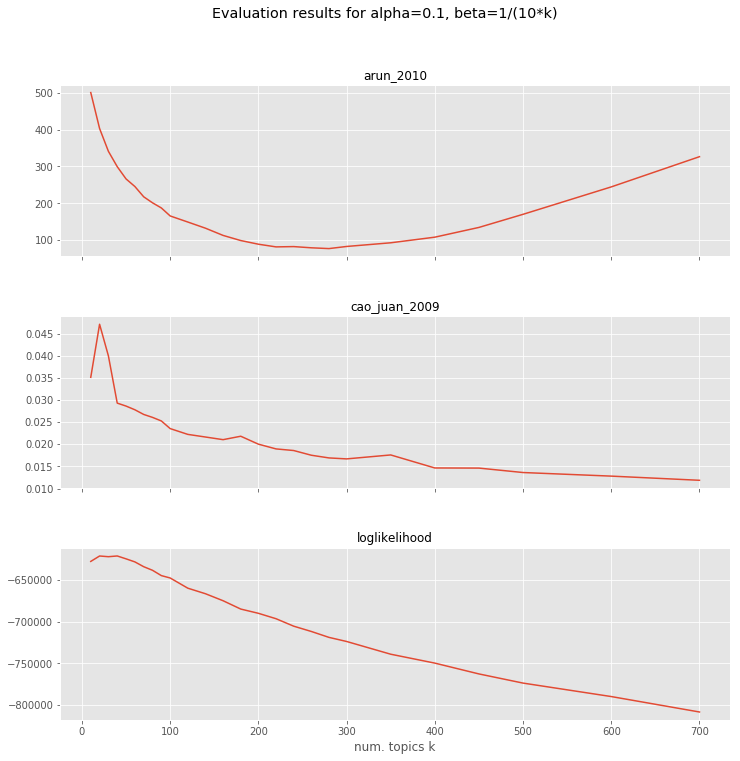

In [23]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [35]:
results_by_n_topics = results_by_parameter(eval_results3, 'n_topics')
logTopics=logScore=-999999
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("arun: %s \t %s" % (arunScore, arunTopics))
print("cao : %s \t %s" % (caoScore, caoTopics))
print("log : %s \t %s" % (logScore, logTopics))

arun: 77.26844929664739 	 280
cao : 0.011870567529107307 	 700
log : -621317.3278940864 	 40


### alpha: 0.1 beta: 0.001

In [24]:
const_params = dict(n_iter=2000, alpha=0.1, eta=0.001)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k) for k in ks]

eval_results4 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:n_topics: 10
INFO:lda:n_topics: 20
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:n_topics: 30
INFO:lda:n_topics: 50
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda

INFO:lda:<20> log likelihood: -675629
INFO:lda:<20> log likelihood: -663972
INFO:lda:<10> log likelihood: -701422
INFO:lda:<30> log likelihood: -666294
INFO:lda:<30> log likelihood: -656825
INFO:lda:<40> log likelihood: -663229
INFO:lda:<10> log likelihood: -719077
INFO:lda:<20> log likelihood: -672710
INFO:lda:<20> log likelihood: -667458
INFO:lda:<50> log likelihood: -661329
INFO:lda:<10> log likelihood: -731610
INFO:lda:<40> log likelihood: -652854
INFO:lda:<10> log likelihood: -707482
INFO:lda:<60> log likelihood: -659103
INFO:lda:<10> log likelihood: -738796
INFO:lda:<10> log likelihood: -727218
INFO:lda:<50> log likelihood: -649935
INFO:lda:<10> log likelihood: -730983
INFO:lda:<70> log likelihood: -657397
INFO:lda:<30> log likelihood: -662838
INFO:lda:<30> log likelihood: -657408
INFO:lda:<80> log likelihood: -656305
INFO:lda:<60> log likelihood: -647210
INFO:lda:<90> log likelihood: -654958
INFO:lda:<10> log likelihood: -748864
INFO:lda:<20> log likelihood: -673879
INFO:lda:<20

INFO:lda:<150> log likelihood: -643047
INFO:lda:<350> log likelihood: -632930
INFO:lda:<250> log likelihood: -634828
INFO:lda:<80> log likelihood: -672660
INFO:lda:<550> log likelihood: -643986
INFO:lda:<130> log likelihood: -650176
INFO:lda:<40> log likelihood: -719686
INFO:lda:<200> log likelihood: -637045
INFO:lda:<560> log likelihood: -644025
INFO:lda:<110> log likelihood: -653629
INFO:lda:<90> log likelihood: -668211
INFO:lda:<260> log likelihood: -633971
INFO:lda:<360> log likelihood: -632570
INFO:lda:<570> log likelihood: -643843
INFO:lda:<50> log likelihood: -709968
INFO:lda:<580> log likelihood: -643989
INFO:lda:<370> log likelihood: -632463
INFO:lda:<140> log likelihood: -649649
INFO:lda:<270> log likelihood: -633798
INFO:lda:<210> log likelihood: -636725
INFO:lda:<160> log likelihood: -642646
INFO:lda:<590> log likelihood: -644225
INFO:lda:<600> log likelihood: -644002
INFO:lda:<380> log likelihood: -632152
INFO:lda:<110> log likelihood: -659057
INFO:lda:<60> log likelihood:

INFO:lda:<290> log likelihood: -637638
INFO:lda:<1050> log likelihood: -643248
INFO:lda:<210> log likelihood: -647366
INFO:lda:<680> log likelihood: -630554
INFO:lda:<380> log likelihood: -632724
INFO:lda:<1060> log likelihood: -643312
INFO:lda:<120> log likelihood: -677079
INFO:lda:<150> log likelihood: -664801
INFO:lda:<190> log likelihood: -651980
INFO:lda:<490> log likelihood: -629875
INFO:lda:<1070> log likelihood: -643114
INFO:lda:<690> log likelihood: -630309
INFO:lda:<260> log likelihood: -642589
INFO:lda:<300> log likelihood: -637859
INFO:lda:<110> log likelihood: -689751
INFO:lda:<1080> log likelihood: -643197
INFO:lda:<700> log likelihood: -630348
INFO:lda:<1090> log likelihood: -643033
INFO:lda:<80> log likelihood: -708130
INFO:lda:<500> log likelihood: -629836
INFO:lda:<390> log likelihood: -632687
INFO:lda:<1100> log likelihood: -643013
INFO:lda:<70> log likelihood: -718897
INFO:lda:<310> log likelihood: -636850
INFO:lda:<1110> log likelihood: -643048
INFO:lda:<710> log l

INFO:lda:<1550> log likelihood: -642093
INFO:lda:<180> log likelihood: -671229
INFO:lda:<100> log likelihood: -714420
INFO:lda:<1560> log likelihood: -642764
INFO:lda:<380> log likelihood: -639301
INFO:lda:<710> log likelihood: -627427
INFO:lda:<1000> log likelihood: -628856
INFO:lda:<160> log likelihood: -684457
INFO:lda:<250> log likelihood: -654629
INFO:lda:<1570> log likelihood: -642525
INFO:lda:<320> log likelihood: -642523
INFO:lda:<450> log likelihood: -634503
INFO:lda:<560> log likelihood: -630255
INFO:lda:<220> log likelihood: -660351
INFO:lda:<1580> log likelihood: -642365
INFO:lda:<1010> log likelihood: -628936
INFO:lda:<720> log likelihood: -627439
INFO:lda:<1590> log likelihood: -642281
INFO:lda:<1020> log likelihood: -628403
INFO:lda:<280> log likelihood: -648202
INFO:lda:<390> log likelihood: -639318
INFO:lda:<1600> log likelihood: -642598
INFO:lda:<460> log likelihood: -634312
INFO:lda:<570> log likelihood: -629865
INFO:lda:<1030> log likelihood: -628668
INFO:lda:<730> 

INFO:lda:<500> log likelihood: -636652
INFO:lda:<1300> log likelihood: -627655
INFO:lda:<350> log likelihood: -646652
INFO:lda:<280> log likelihood: -658558
INFO:lda:<410> log likelihood: -641081
INFO:lda:<320> log likelihood: -652187
INFO:lda:<920> log likelihood: -626790
INFO:lda:<1310> log likelihood: -628025
INFO:lda:<730> log likelihood: -628398
INFO:lda:<150> log likelihood: -697983
INFO:lda:<1320> log likelihood: -628128
INFO:lda:<170> log likelihood: -690553
INFO:lda:<240> log likelihood: -668866
INFO:lda:<120> log likelihood: -715368
INFO:lda:<510> log likelihood: -636767
INFO:lda:<590> log likelihood: -632261
INFO:lda:<930> log likelihood: -627195
INFO:lda:<1330> log likelihood: -628217
INFO:lda:<740> log likelihood: -628241
INFO:lda:<420> log likelihood: -640755
INFO:lda:<360> log likelihood: -646902
INFO:lda:<940> log likelihood: -627022
INFO:lda:<1340> log likelihood: -627818
INFO:lda:<290> log likelihood: -656902
INFO:lda:<1350> log likelihood: -627766
INFO:lda:<210> log 

INFO:lda:<1220> log likelihood: -625766
INFO:lda:<420> log likelihood: -650228
INFO:lda:<220> log likelihood: -686513
INFO:lda:<310> log likelihood: -665673
INFO:lda:<1720> log likelihood: -627520
INFO:lda:<660> log likelihood: -634730
INFO:lda:<1230> log likelihood: -626443
INFO:lda:<960> log likelihood: -627334
INFO:lda:<770> log likelihood: -631648
INFO:lda:<1730> log likelihood: -627689
INFO:lda:<1240> log likelihood: -626539
INFO:lda:<470> log likelihood: -646088
INFO:lda:<550> log likelihood: -639290
INFO:lda:<1740> log likelihood: -627382
INFO:lda:<970> log likelihood: -627558
INFO:lda:<670> log likelihood: -634749
INFO:lda:<160> log likelihood: -713349
INFO:lda:<1250> log likelihood: -626150
INFO:lda:<270> log likelihood: -677917
INFO:lda:<780> log likelihood: -631193
INFO:lda:<1750> log likelihood: -627613
INFO:lda:<380> log likelihood: -655443
INFO:lda:<430> log likelihood: -650130
INFO:lda:<1260> log likelihood: -626464
INFO:lda:<1760> log likelihood: -627641
INFO:lda:<200> 

INFO:lda:<210> log likelihood: -704179
INFO:lda:<1180> log likelihood: -626954
INFO:lda:<1520> log likelihood: -626067
INFO:lda:<940> log likelihood: -631218
INFO:lda:<670> log likelihood: -638441
INFO:lda:<380> log likelihood: -664219
INFO:lda:<0> log likelihood: -1551621
INFO:lda:<1190> log likelihood: -627004
INFO:lda:<810> log likelihood: -633105
INFO:lda:<1530> log likelihood: -626234
INFO:lda:<580> log likelihood: -645108
INFO:lda:<460> log likelihood: -653707
INFO:lda:<950> log likelihood: -631242
INFO:lda:<1200> log likelihood: -626703
INFO:lda:<520> log likelihood: -649276
INFO:lda:<1540> log likelihood: -626076
INFO:lda:<60> log likelihood: -735128
INFO:lda:<240> log likelihood: -692030
INFO:lda:<680> log likelihood: -638114
INFO:lda:<820> log likelihood: -632978
INFO:lda:<1550> log likelihood: -625912
INFO:lda:<960> log likelihood: -630933
INFO:lda:<1210> log likelihood: -626856
INFO:lda:<590> log likelihood: -644315
INFO:lda:<1560> log likelihood: -626169
INFO:lda:<530> log

INFO:lda:<470> log likelihood: -662535
INFO:lda:<710> log likelihood: -644258
INFO:lda:<1170> log likelihood: -630773
INFO:lda:<1900> log likelihood: -625478
INFO:lda:<100> log likelihood: -729205
INFO:lda:<400> log likelihood: -674362
INFO:lda:<1470> log likelihood: -626223
INFO:lda:<340> log likelihood: -682926
INFO:lda:<840> log likelihood: -636901
INFO:lda:<1180> log likelihood: -630758
INFO:lda:<1910> log likelihood: -625282
INFO:lda:<260> log likelihood: -701551
INFO:lda:<570> log likelihood: -651855
INFO:lda:<1010> log likelihood: -632933
INFO:lda:<1480> log likelihood: -626335
INFO:lda:<1920> log likelihood: -625742
INFO:lda:<650> log likelihood: -647387
INFO:lda:<1190> log likelihood: -631271
INFO:lda:<240> log likelihood: -710426
INFO:lda:<720> log likelihood: -643708
INFO:lda:<1930> log likelihood: -625713
INFO:lda:<850> log likelihood: -637315
INFO:lda:<40> log likelihood: -746195
INFO:lda:<480> log likelihood: -662713
INFO:lda:<1490> log likelihood: -626492
INFO:lda:<1020>

INFO:lda:<560> log likelihood: -661246
INFO:lda:<1200> log likelihood: -632785
INFO:lda:<350> log likelihood: -689242
INFO:lda:<1410> log likelihood: -630731
INFO:lda:<1750> log likelihood: -625057
INFO:lda:<310> log likelihood: -699162
INFO:lda:<770> log likelihood: -646984
INFO:lda:<480> log likelihood: -672792
INFO:lda:<860> log likelihood: -643382
INFO:lda:<1210> log likelihood: -632934
INFO:lda:<1760> log likelihood: -625493
INFO:lda:<1010> log likelihood: -637045
INFO:lda:<1420> log likelihood: -630568
INFO:lda:<20> log likelihood: -770137
INFO:lda:<680> log likelihood: -651774
INFO:lda:<570> log likelihood: -661132
INFO:lda:<1770> log likelihood: -625012
INFO:lda:<1430> log likelihood: -630479
INFO:lda:<1220> log likelihood: -632720
INFO:lda:<780> log likelihood: -646128
INFO:lda:<80> log likelihood: -733971
INFO:lda:<410> log likelihood: -681542
INFO:lda:<1020> log likelihood: -637092
INFO:lda:<1780> log likelihood: -624647
INFO:lda:<870> log likelihood: -643421
INFO:lda:<1440>

INFO:lda:<1650> log likelihood: -630072
INFO:lda:<0> log likelihood: -1572665
INFO:lda:<1410> log likelihood: -632861
INFO:lda:<1180> log likelihood: -636501
INFO:lda:<800> log likelihood: -651193
INFO:lda:<1660> log likelihood: -629831
INFO:lda:<660> log likelihood: -660876
INFO:lda:<1420> log likelihood: -633297
INFO:lda:<190> log likelihood: -719010
INFO:lda:<910> log likelihood: -645670
INFO:lda:<1020> log likelihood: -642340
INFO:lda:<480> log likelihood: -680984
INFO:lda:<1190> log likelihood: -636519
INFO:lda:<570> log likelihood: -671186
INFO:lda:<120> log likelihood: -727960
INFO:lda:<1670> log likelihood: -630025
INFO:lda:<60> log likelihood: -743272
INFO:lda:<370> log likelihood: -696424
INFO:lda:<1430> log likelihood: -633039
INFO:lda:<810> log likelihood: -650872
INFO:lda:<1030> log likelihood: -642974
INFO:lda:<1680> log likelihood: -629970
INFO:lda:<420> log likelihood: -687508
INFO:lda:<1200> log likelihood: -636617
INFO:lda:<920> log likelihood: -645473
INFO:lda:<1440>

INFO:lda:<1210> log likelihood: -641920
INFO:lda:<1980> log likelihood: -629516
INFO:lda:<1680> log likelihood: -632194
INFO:lda:<670> log likelihood: -670941
INFO:lda:<1080> log likelihood: -645046
INFO:lda:<1420> log likelihood: -636863
INFO:lda:<170> log likelihood: -723166
INFO:lda:<960> log likelihood: -650139
INFO:lda:<1990> log likelihood: -629431
INFO:lda:<440> log likelihood: -695696
INFO:lda:<570> log likelihood: -677396
INFO:lda:<1220> log likelihood: -641878
INFO:lda:<780> log likelihood: -659992
INFO:lda:<490> log likelihood: -686376
INFO:lda:<1690> log likelihood: -632417
INFO:lda:<1999> log likelihood: -629659
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -629430.640628
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.028125
INFO:lda:<400> log likelihood: -704084
INFO:lda:<1430> log likelihood: -636553
INFO:lda:<250> log likelihood: -715456
INFO:lda:<1090> log likelihood: -644892
INFO:tmtoolkit:> evaluation result with metric "arun_2010

INFO:lda:<1420> log likelihood: -641530
INFO:lda:<1950> log likelihood: -631596
INFO:lda:<900> log likelihood: -659409
INFO:lda:<1110> log likelihood: -649656
INFO:lda:<30> log likelihood: -779045
INFO:lda:<1650> log likelihood: -636146
INFO:lda:<660> log likelihood: -677657
INFO:lda:<570> log likelihood: -685337
INFO:lda:<220> log likelihood: -719523
INFO:lda:<1260> log likelihood: -644928
INFO:lda:<1960> log likelihood: -632130
INFO:lda:<1430> log likelihood: -641878
INFO:lda:<1660> log likelihood: -636236
INFO:lda:<780> log likelihood: -670459
INFO:lda:<1970> log likelihood: -631622
INFO:lda:<1120> log likelihood: -649438
INFO:lda:<910> log likelihood: -659280
INFO:lda:<1440> log likelihood: -641852
INFO:lda:<1270> log likelihood: -644812
INFO:lda:<310> log likelihood: -713912
INFO:lda:<1670> log likelihood: -636417
INFO:lda:<470> log likelihood: -702921
INFO:lda:<520> log likelihood: -694040
INFO:lda:<1980> log likelihood: -631930
INFO:lda:<670> log likelihood: -676932
INFO:lda:<14

INFO:lda:<1910> log likelihood: -636083
INFO:lda:<1050> log likelihood: -658422
INFO:lda:<370> log likelihood: -711922
INFO:lda:<280> log likelihood: -716594
INFO:lda:<1460> log likelihood: -644210
INFO:lda:<540> log likelihood: -701902
INFO:lda:<1660> log likelihood: -641340
INFO:lda:<770> log likelihood: -675968
INFO:lda:<1290> log likelihood: -649747
INFO:lda:<1920> log likelihood: -636740
INFO:lda:<660> log likelihood: -685346
INFO:lda:<210> log likelihood: -729213
INFO:lda:<1470> log likelihood: -644694
INFO:lda:<1670> log likelihood: -641633
INFO:lda:<900> log likelihood: -670617
INFO:lda:<1060> log likelihood: -658944
INFO:lda:<1930> log likelihood: -636681
INFO:lda:<1300> log likelihood: -649125
INFO:lda:<600> log likelihood: -692439
INFO:lda:<30> log likelihood: -791210
INFO:lda:<1680> log likelihood: -641230
INFO:lda:<1480> log likelihood: -644008
INFO:lda:<780> log likelihood: -676061
INFO:lda:<1940> log likelihood: -636461
INFO:lda:<1310> log likelihood: -649092
INFO:lda:<6

INFO:lda:<120> log likelihood: -756195
INFO:lda:<1680> log likelihood: -644137
INFO:lda:<1920> log likelihood: -641330
INFO:lda:<760> log likelihood: -683460
INFO:lda:<200> log likelihood: -738507
INFO:lda:<1220> log likelihood: -658130
INFO:lda:<1490> log likelihood: -649292
INFO:lda:<1690> log likelihood: -644340
INFO:lda:<70> log likelihood: -777070
INFO:lda:<1930> log likelihood: -641142
INFO:lda:<350> log likelihood: -715524
INFO:lda:<1040> log likelihood: -669906
INFO:lda:<270> log likelihood: -727621
INFO:lda:<630> log likelihood: -701350
INFO:lda:<890> log likelihood: -675822
INFO:lda:<1700> log likelihood: -644517
INFO:lda:<1500> log likelihood: -648953
INFO:lda:<1230> log likelihood: -658759
INFO:lda:<690> log likelihood: -692005
INFO:lda:<1940> log likelihood: -641151
INFO:lda:<770> log likelihood: -683904
INFO:lda:<450> log likelihood: -709946
INFO:lda:<1710> log likelihood: -644282
INFO:lda:<1950> log likelihood: -640984
INFO:lda:<1510> log likelihood: -649177
INFO:lda:<10

INFO:lda:<1710> log likelihood: -648155
INFO:lda:<720> log likelihood: -700721
INFO:lda:<1190> log likelihood: -669314
INFO:lda:<430> log likelihood: -713699
INFO:lda:<1020> log likelihood: -675467
INFO:lda:<340> log likelihood: -724851
INFO:lda:<1950> log likelihood: -644251
INFO:lda:<1410> log likelihood: -658142
INFO:lda:<1720> log likelihood: -648236
INFO:lda:<790> log likelihood: -690785
INFO:lda:<1960> log likelihood: -644007
INFO:lda:<540> log likelihood: -708457
INFO:lda:<1200> log likelihood: -669653
INFO:lda:<1420> log likelihood: -658059
INFO:lda:<1730> log likelihood: -648606
INFO:lda:<890> log likelihood: -683733
INFO:lda:<180> log likelihood: -750798
INFO:lda:<1970> log likelihood: -643770
INFO:lda:<270> log likelihood: -735372
INFO:lda:<1030> log likelihood: -675466
INFO:lda:<730> log likelihood: -701314
INFO:lda:<120> log likelihood: -771014
INFO:lda:<1430> log likelihood: -657634
INFO:lda:<1740> log likelihood: -648470
INFO:lda:<1210> log likelihood: -669524
INFO:lda:<

INFO:lda:<420> log likelihood: -722929
INFO:lda:<1620> log likelihood: -658116
INFO:lda:<910> log likelihood: -690957
INFO:lda:<1980> log likelihood: -647652
INFO:lda:<1380> log likelihood: -669051
INFO:lda:<520> log likelihood: -712880
INFO:lda:<1630> log likelihood: -658174
INFO:lda:<70> log likelihood: -801000
INFO:lda:<1990> log likelihood: -647706
INFO:lda:<1180> log likelihood: -675705
INFO:lda:<830> log likelihood: -701022
INFO:lda:<1030> log likelihood: -683073
INFO:lda:<640> log likelihood: -707405
INFO:lda:<1999> log likelihood: -648039
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -647706.279061
INFO:lda:<920> log likelihood: -690510
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.023546
INFO:lda:<1640> log likelihood: -657633
INFO:lda:<1390> log likelihood: -669146
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 165.801890
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters

INFO:lda:<1360> log likelihood: -674631
INFO:lda:<1880> log likelihood: -657293
INFO:lda:<1050> log likelihood: -690588
INFO:lda:<520> log likelihood: -720284
INFO:lda:<430> log likelihood: -730119
INFO:lda:<1600> log likelihood: -669255
INFO:lda:<1890> log likelihood: -657820
INFO:lda:<70> log likelihood: -822960
INFO:lda:<1370> log likelihood: -675142
INFO:lda:<960> log likelihood: -699550
INFO:lda:<320> log likelihood: -745660
INFO:lda:<1190> log likelihood: -682011
INFO:lda:<760> log likelihood: -707502
INFO:lda:<1060> log likelihood: -690936
INFO:lda:<630> log likelihood: -711593
INFO:lda:<1900> log likelihood: -657957
INFO:lda:<240> log likelihood: -762865
INFO:lda:<1610> log likelihood: -669422
INFO:lda:<1380> log likelihood: -674836
INFO:lda:<530> log likelihood: -719795
INFO:lda:<1910> log likelihood: -657713
INFO:lda:<1200> log likelihood: -682041
INFO:lda:<1620> log likelihood: -669030
INFO:lda:<1070> log likelihood: -691167
INFO:lda:<770> log likelihood: -706809
INFO:lda:<9

INFO:lda:<890> log likelihood: -705549
INFO:lda:<1230> log likelihood: -690817
INFO:lda:<1380> log likelihood: -682427
INFO:lda:<1110> log likelihood: -699100
INFO:lda:<80> log likelihood: -838428
INFO:lda:<540> log likelihood: -727802
INFO:lda:<1850> log likelihood: -669110
INFO:lda:<640> log likelihood: -719214
INFO:lda:<410> log likelihood: -742604
INFO:lda:<1590> log likelihood: -674074
INFO:lda:<1390> log likelihood: -682677
INFO:lda:<1860> log likelihood: -668916
INFO:lda:<900> log likelihood: -706267
INFO:lda:<760> log likelihood: -711314
INFO:lda:<1240> log likelihood: -690072
INFO:lda:<1600> log likelihood: -674481
INFO:lda:<1120> log likelihood: -698903
INFO:lda:<320> log likelihood: -759073
INFO:lda:<1870> log likelihood: -669120
INFO:lda:<190> log likelihood: -791583
INFO:lda:<1400> log likelihood: -682192
INFO:lda:<650> log likelihood: -719558
INFO:lda:<550> log likelihood: -728371
INFO:lda:<1880> log likelihood: -668615
INFO:lda:<1250> log likelihood: -689898
INFO:lda:<16

INFO:lda:<1600> log likelihood: -682318
INFO:lda:<1050> log likelihood: -705951
INFO:lda:<900> log likelihood: -710659
INFO:lda:<660> log likelihood: -727613
INFO:lda:<320> log likelihood: -773074
INFO:lda:<1430> log likelihood: -690041
INFO:lda:<130> log likelihood: -832188
INFO:lda:<1840> log likelihood: -674526
INFO:lda:<1290> log likelihood: -697993
INFO:lda:<1610> log likelihood: -682695
INFO:lda:<260> log likelihood: -786155
INFO:lda:<780> log likelihood: -718512
INFO:lda:<1060> log likelihood: -705897
INFO:lda:<1850> log likelihood: -673770
INFO:lda:<520> log likelihood: -741339
INFO:lda:<1440> log likelihood: -690126
INFO:lda:<410> log likelihood: -757819
INFO:lda:<910> log likelihood: -710318
INFO:lda:<1300> log likelihood: -698103
INFO:lda:<670> log likelihood: -727349
INFO:lda:<1620> log likelihood: -681671
INFO:lda:<1860> log likelihood: -673929
INFO:lda:<1450> log likelihood: -690753
INFO:lda:<1070> log likelihood: -705276
INFO:lda:<790> log likelihood: -718613
INFO:lda:<1

INFO:lda:<1230> log likelihood: -704346
INFO:lda:<410> log likelihood: -772434
INFO:lda:<1650> log likelihood: -690571
INFO:lda:<340> log likelihood: -783179
INFO:lda:<1490> log likelihood: -697786
INFO:lda:<1860> log likelihood: -681711
INFO:lda:<510> log likelihood: -756457
INFO:lda:<190> log likelihood: -828789
INFO:lda:<1070> log likelihood: -709852
INFO:lda:<930> log likelihood: -717416
INFO:lda:<810> log likelihood: -726914
INFO:lda:<1240> log likelihood: -704653
INFO:lda:<1660> log likelihood: -690700
INFO:lda:<1870> log likelihood: -682126
INFO:lda:<1500> log likelihood: -697531
INFO:lda:<640> log likelihood: -741092
INFO:lda:<1880> log likelihood: -681220
INFO:lda:<1670> log likelihood: -690843
INFO:lda:<1080> log likelihood: -710336
INFO:lda:<940> log likelihood: -717229
INFO:lda:<1250> log likelihood: -704451
INFO:lda:<420> log likelihood: -772065
INFO:lda:<820> log likelihood: -726458
INFO:lda:<1510> log likelihood: -698163
INFO:lda:<520> log likelihood: -755650
INFO:lda:<1

INFO:lda:<1910> log likelihood: -689605
INFO:lda:<770> log likelihood: -740422
INFO:lda:<1260> log likelihood: -709705
INFO:lda:<630> log likelihood: -755618
INFO:lda:<1110> log likelihood: -717149
INFO:lda:<1450> log likelihood: -704170
INFO:lda:<1730> log likelihood: -697762
INFO:lda:<260> log likelihood: -826438
INFO:lda:<1920> log likelihood: -690340
INFO:lda:<520> log likelihood: -770174
INFO:lda:<440> log likelihood: -781722
INFO:lda:<980> log likelihood: -724804
INFO:lda:<1270> log likelihood: -709531
INFO:lda:<1740> log likelihood: -698002
INFO:lda:<1120> log likelihood: -717190
INFO:lda:<1460> log likelihood: -704370
INFO:lda:<1930> log likelihood: -689771
INFO:lda:<780> log likelihood: -740332
INFO:lda:<640> log likelihood: -755490
INFO:lda:<340> log likelihood: -802908
INFO:lda:<1750> log likelihood: -697600
INFO:lda:<1280> log likelihood: -709842
INFO:lda:<990> log likelihood: -725241
INFO:lda:<1940> log likelihood: -690042
INFO:lda:<1470> log likelihood: -703980
INFO:lda:<

INFO:lda:<1690> log likelihood: -703433
INFO:lda:<1490> log likelihood: -709679
INFO:lda:<770> log likelihood: -754622
INFO:lda:<550> log likelihood: -779978
INFO:lda:<1700> log likelihood: -703659
INFO:lda:<340> log likelihood: -825850
INFO:lda:<1170> log likelihood: -723878
INFO:lda:<1320> log likelihood: -717345
INFO:lda:<940> log likelihood: -738763
INFO:lda:<650> log likelihood: -768215
INFO:lda:<1500> log likelihood: -709026
INFO:lda:<430> log likelihood: -802078
INFO:lda:<1710> log likelihood: -702976
INFO:lda:<780> log likelihood: -754409
INFO:lda:<1330> log likelihood: -717199
INFO:lda:<1180> log likelihood: -724484
INFO:lda:<1510> log likelihood: -709694
INFO:lda:<950> log likelihood: -738836
INFO:lda:<560> log likelihood: -779993
INFO:lda:<1720> log likelihood: -702737
INFO:lda:<660> log likelihood: -768651
INFO:lda:<1520> log likelihood: -709901
INFO:lda:<1340> log likelihood: -716791
INFO:lda:<1190> log likelihood: -724638
INFO:lda:<790> log likelihood: -754161
INFO:lda:<4

INFO:lda:<690> log likelihood: -779131
INFO:lda:<1140> log likelihood: -737820
INFO:lda:<1410> log likelihood: -723655
INFO:lda:<1580> log likelihood: -716238
INFO:lda:<950> log likelihood: -753704
INFO:lda:<1780> log likelihood: -710061
INFO:lda:<550> log likelihood: -799753
INFO:lda:<1150> log likelihood: -737881
INFO:lda:<1420> log likelihood: -723472
INFO:lda:<1590> log likelihood: -717129
INFO:lda:<1790> log likelihood: -709279
INFO:lda:<700> log likelihood: -778499
INFO:lda:<810> log likelihood: -766021
INFO:lda:<1430> log likelihood: -723944
INFO:lda:<960> log likelihood: -753326
INFO:lda:<450> log likelihood: -823493
INFO:lda:<1600> log likelihood: -716747
INFO:lda:<1160> log likelihood: -737930
INFO:lda:<1800> log likelihood: -709674
INFO:lda:<560> log likelihood: -799041
INFO:lda:<1440> log likelihood: -724048
INFO:lda:<1610> log likelihood: -716458
INFO:lda:<1810> log likelihood: -709919
INFO:lda:<820> log likelihood: -766618
INFO:lda:<710> log likelihood: -778663
INFO:lda:<

INFO:lda:<1170> log likelihood: -752554
INFO:lda:<1720> log likelihood: -724253
INFO:lda:<1910> log likelihood: -716881
INFO:lda:<1000> log likelihood: -766063
INFO:lda:<1410> log likelihood: -737686
INFO:lda:<700> log likelihood: -799145
INFO:lda:<1730> log likelihood: -723698
INFO:lda:<1920> log likelihood: -716733
INFO:lda:<1180> log likelihood: -753378
INFO:lda:<880> log likelihood: -777572
INFO:lda:<1420> log likelihood: -737374
INFO:lda:<1740> log likelihood: -724407
INFO:lda:<1010> log likelihood: -765935
INFO:lda:<1930> log likelihood: -717043
INFO:lda:<580> log likelihood: -821274
INFO:lda:<1190> log likelihood: -753234
INFO:lda:<1430> log likelihood: -737399
INFO:lda:<710> log likelihood: -799121
INFO:lda:<890> log likelihood: -777325
INFO:lda:<1750> log likelihood: -724364
INFO:lda:<1940> log likelihood: -717164
INFO:lda:<1020> log likelihood: -765788
INFO:lda:<1950> log likelihood: -716346
INFO:lda:<1200> log likelihood: -753173
INFO:lda:<1760> log likelihood: -723591
INFO:

INFO:lda:<1760> log likelihood: -736905
INFO:lda:<1480> log likelihood: -751742
INFO:lda:<750> log likelihood: -818872
INFO:lda:<1270> log likelihood: -765470
INFO:lda:<1770> log likelihood: -736933
INFO:lda:<1130> log likelihood: -776996
INFO:lda:<910> log likelihood: -798087
INFO:lda:<1490> log likelihood: -751685
INFO:lda:<1280> log likelihood: -765646
INFO:lda:<1780> log likelihood: -737470
INFO:lda:<1140> log likelihood: -776701
INFO:lda:<760> log likelihood: -819351
INFO:lda:<1500> log likelihood: -751973
INFO:lda:<920> log likelihood: -797743
INFO:lda:<1790> log likelihood: -736951
INFO:lda:<1290> log likelihood: -765528
INFO:lda:<1510> log likelihood: -751761
INFO:lda:<1150> log likelihood: -776891
INFO:lda:<1800> log likelihood: -737028
INFO:lda:<770> log likelihood: -819121
INFO:lda:<1300> log likelihood: -764806
INFO:lda:<930> log likelihood: -797245
INFO:lda:<1520> log likelihood: -751948
INFO:lda:<1810> log likelihood: -737469
INFO:lda:<1160> log likelihood: -776291
INFO:l

INFO:lda:<1200> log likelihood: -796384
INFO:lda:<1930> log likelihood: -751792
INFO:lda:<1490> log likelihood: -774523
INFO:lda:<1670> log likelihood: -763160
INFO:lda:<1010> log likelihood: -816803
INFO:lda:<1210> log likelihood: -796774
INFO:lda:<1940> log likelihood: -751608
INFO:lda:<1680> log likelihood: -763438
INFO:lda:<1500> log likelihood: -775178
INFO:lda:<1950> log likelihood: -750882
INFO:lda:<1020> log likelihood: -817230
INFO:lda:<1220> log likelihood: -797599
INFO:lda:<1690> log likelihood: -763739
INFO:lda:<1960> log likelihood: -751119
INFO:lda:<1510> log likelihood: -775226
INFO:lda:<1700> log likelihood: -763303
INFO:lda:<1970> log likelihood: -750755
INFO:lda:<1230> log likelihood: -796386
INFO:lda:<1030> log likelihood: -816948
INFO:lda:<1520> log likelihood: -775585
INFO:lda:<1980> log likelihood: -751088
INFO:lda:<1710> log likelihood: -763567
INFO:lda:<1530> log likelihood: -775358
INFO:lda:<1240> log likelihood: -796600
INFO:lda:<1040> log likelihood: -816714


INFO:lda:<1710> log likelihood: -796902
INFO:lda:<1720> log likelihood: -796936
INFO:lda:<1450> log likelihood: -816511
INFO:lda:<1730> log likelihood: -795989
INFO:lda:<1460> log likelihood: -816799
INFO:lda:<1740> log likelihood: -796802
INFO:lda:<1470> log likelihood: -815865
INFO:lda:<1750> log likelihood: -796628
INFO:lda:<1480> log likelihood: -816465
INFO:lda:<1760> log likelihood: -796431
INFO:lda:<1490> log likelihood: -815645
INFO:lda:<1770> log likelihood: -796636
INFO:lda:<1500> log likelihood: -816374
INFO:lda:<1780> log likelihood: -796236
INFO:lda:<1790> log likelihood: -796278
INFO:lda:<1510> log likelihood: -816522
INFO:lda:<1800> log likelihood: -795461
INFO:lda:<1520> log likelihood: -816047
INFO:lda:<1810> log likelihood: -796151
INFO:lda:<1530> log likelihood: -816160
INFO:lda:<1820> log likelihood: -794842
INFO:lda:<1540> log likelihood: -816665
INFO:lda:<1830> log likelihood: -796530
INFO:lda:<1550> log likelihood: -816000
INFO:lda:<1840> log likelihood: -796619


plotting evaluation results


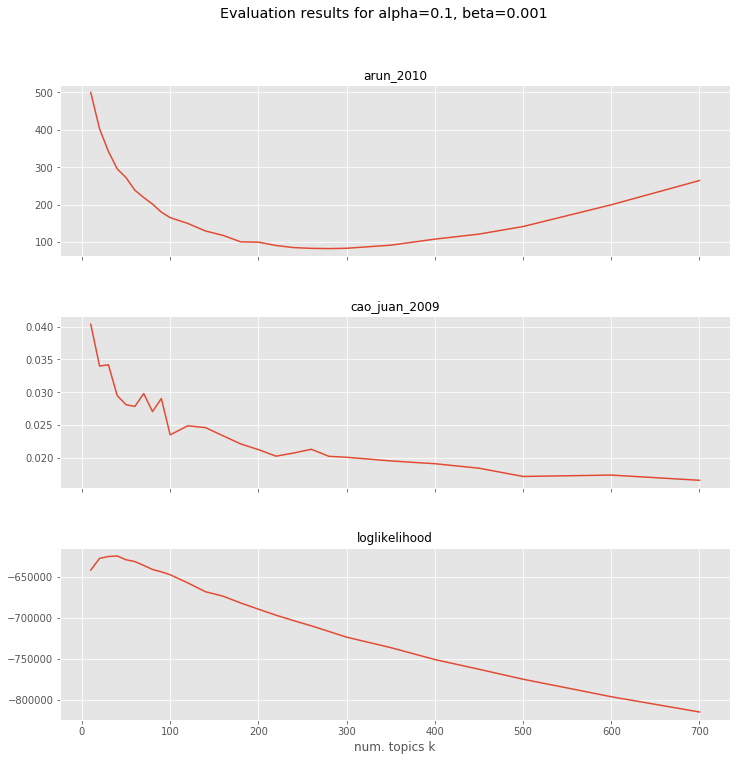

In [25]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=0.1, beta=0.001', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [33]:
results_by_n_topics = results_by_parameter(eval_results4, 'n_topics')
logTopics=logScore=-999999
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("arun: %s \t %s" % (arunScore, arunTopics))
print("cao : %s \t %s" % (caoScore, caoTopics))
print("log : %s \t %s" % (logScore, logTopics))

arun: 83.11988387497797 	 280
cao : 0.01664135993587448 	 700
log : -624785.4154434471 	 40


### alpha: 1/k beta: 1/(10*k)

In [26]:
const_params = dict(n_iter=2000)
ks = list(range(10, 100, 10)) + list(range(100, 300, 20)) + list(range(300, 500, 50)) + [500, 600, 700]
varying_params = [dict(n_topics=k, alpha=1.0/k, eta=1.0/(10*k)) for k in ks]

eval_results5 = tm_lda.evaluate_topic_models(dtm,
    varying_params,
    const_params)

INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 10
INFO:lda:n_iter: 2000
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 21833
INFO:lda:n_topics: 20
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_topics: 40
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_words: 104073
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 50
INFO:lda:n_topics: 30
INFO:lda:vocab_size: 6671
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:n_words: 104073
INFO:lda:vocab_size: 6671
INFO:lda:n_words: 104073
INFO:lda:n_iter: 2000
INFO:lda:vocab_size: 6671
INFO:lda:vocab_size: 6671
INFO:lda:n_topics: 60
INFO:lda:n_documents: 21833
INFO:lda:n_documents: 21833
INFO:lda:

INFO:lda:<0> log likelihood: -1280465
INFO:lda:<0> log likelihood: -1463138
INFO:lda:<40> log likelihood: -638277
INFO:lda:<20> log likelihood: -646614
INFO:lda:<20> log likelihood: -652044
INFO:lda:<50> log likelihood: -636141
INFO:lda:<10> log likelihood: -714720
INFO:lda:<10> log likelihood: -716123
INFO:lda:<10> log likelihood: -705053
INFO:lda:<60> log likelihood: -635000
INFO:lda:<30> log likelihood: -631524
INFO:lda:<20> log likelihood: -654220
INFO:lda:<70> log likelihood: -633534
INFO:lda:<30> log likelihood: -631045
INFO:lda:<40> log likelihood: -625824
INFO:lda:<10> log likelihood: -716270
INFO:lda:<10> log likelihood: -716522
INFO:lda:<10> log likelihood: -709941
INFO:lda:<80> log likelihood: -632669
INFO:lda:<20> log likelihood: -657963
INFO:lda:<10> log likelihood: -715574
INFO:lda:<10> log likelihood: -721362
INFO:lda:<90> log likelihood: -632217
INFO:lda:<30> log likelihood: -635492
INFO:lda:<50> log likelihood: -622096
INFO:lda:<20> log likelihood: -648118
INFO:lda:<10

INFO:lda:<200> log likelihood: -597746
INFO:lda:<150> log likelihood: -593426
INFO:lda:<560> log likelihood: -628541
INFO:lda:<50> log likelihood: -616298
INFO:lda:<360> log likelihood: -609748
INFO:lda:<570> log likelihood: -628279
INFO:lda:<130> log likelihood: -593189
INFO:lda:<370> log likelihood: -609572
INFO:lda:<580> log likelihood: -628656
INFO:lda:<250> log likelihood: -600740
INFO:lda:<110> log likelihood: -596049
INFO:lda:<590> log likelihood: -628864
INFO:lda:<80> log likelihood: -603531
INFO:lda:<100> log likelihood: -599513
INFO:lda:<380> log likelihood: -609618
INFO:lda:<160> log likelihood: -593223
INFO:lda:<210> log likelihood: -597552
INFO:lda:<50> log likelihood: -612541
INFO:lda:<600> log likelihood: -628660
INFO:lda:<390> log likelihood: -610216
INFO:lda:<610> log likelihood: -628367
INFO:lda:<70> log likelihood: -605581
INFO:lda:<80> log likelihood: -600891
INFO:lda:<140> log likelihood: -592401
INFO:lda:<260> log likelihood: -600683
INFO:lda:<620> log likelihood:

INFO:lda:<1060> log likelihood: -628696
INFO:lda:<100> log likelihood: -595817
INFO:lda:<190> log likelihood: -588101
INFO:lda:<210> log likelihood: -586791
INFO:lda:<690> log likelihood: -608984
INFO:lda:<1070> log likelihood: -628305
INFO:lda:<160> log likelihood: -586498
INFO:lda:<390> log likelihood: -591466
INFO:lda:<1080> log likelihood: -628020
INFO:lda:<480> log likelihood: -597954
INFO:lda:<130> log likelihood: -591417
INFO:lda:<700> log likelihood: -608901
INFO:lda:<1090> log likelihood: -628348
INFO:lda:<300> log likelihood: -588568
INFO:lda:<260> log likelihood: -587839
INFO:lda:<150> log likelihood: -588267
INFO:lda:<1100> log likelihood: -627786
INFO:lda:<80> log likelihood: -603876
INFO:lda:<400> log likelihood: -590881
INFO:lda:<710> log likelihood: -609108
INFO:lda:<70> log likelihood: -610523
INFO:lda:<490> log likelihood: -597200
INFO:lda:<1110> log likelihood: -628006
INFO:lda:<220> log likelihood: -586026
INFO:lda:<200> log likelihood: -587683
INFO:lda:<60> log lik

INFO:lda:<1550> log likelihood: -628043
INFO:lda:<700> log likelihood: -595557
INFO:lda:<240> log likelihood: -580299
INFO:lda:<1010> log likelihood: -608887
INFO:lda:<1560> log likelihood: -628332
INFO:lda:<310> log likelihood: -583103
INFO:lda:<100> log likelihood: -600786
INFO:lda:<570> log likelihood: -589463
INFO:lda:<1570> log likelihood: -628365
INFO:lda:<1020> log likelihood: -608695
INFO:lda:<710> log likelihood: -595801
INFO:lda:<1580> log likelihood: -628085
INFO:lda:<380> log likelihood: -584704
INFO:lda:<1030> log likelihood: -608588
INFO:lda:<450> log likelihood: -585978
INFO:lda:<1590> log likelihood: -627987
INFO:lda:<190> log likelihood: -585240
INFO:lda:<1600> log likelihood: -628201
INFO:lda:<580> log likelihood: -589192
INFO:lda:<720> log likelihood: -595474
INFO:lda:<220> log likelihood: -582281
INFO:lda:<1040> log likelihood: -608517
INFO:lda:<1610> log likelihood: -627799
INFO:lda:<290> log likelihood: -583162
INFO:lda:<320> log likelihood: -582570
INFO:lda:<1620

INFO:lda:<170> log likelihood: -587461
INFO:lda:<1280> log likelihood: -608428
INFO:lda:<900> log likelihood: -595207
INFO:lda:<400> log likelihood: -581293
INFO:lda:<570> log likelihood: -585700
INFO:lda:<1290> log likelihood: -608377
INFO:lda:<740> log likelihood: -588973
INFO:lda:<910> log likelihood: -595376
INFO:lda:<490> log likelihood: -581762
INFO:lda:<130> log likelihood: -595466
INFO:lda:<240> log likelihood: -582080
INFO:lda:<1300> log likelihood: -608405
INFO:lda:<320> log likelihood: -577328
INFO:lda:<370> log likelihood: -580144
INFO:lda:<410> log likelihood: -581112
INFO:lda:<580> log likelihood: -585644
INFO:lda:<920> log likelihood: -595292
INFO:lda:<200> log likelihood: -582723
INFO:lda:<1310> log likelihood: -608457
INFO:lda:<750> log likelihood: -588559
INFO:lda:<500> log likelihood: -581709
INFO:lda:<1320> log likelihood: -608433
INFO:lda:<290> log likelihood: -579751
INFO:lda:<930> log likelihood: -595420
INFO:lda:<590> log likelihood: -585653
INFO:lda:<1330> log 

INFO:lda:<540> log likelihood: -578658
INFO:lda:<420> log likelihood: -575559
INFO:lda:<150> log likelihood: -586748
INFO:lda:<750> log likelihood: -585371
INFO:lda:<970> log likelihood: -588425
INFO:lda:<1690> log likelihood: -607053
INFO:lda:<170> log likelihood: -590554
INFO:lda:<1210> log likelihood: -594881
INFO:lda:<650> log likelihood: -580238
INFO:lda:<1700> log likelihood: -607151
INFO:lda:<760> log likelihood: -584914
INFO:lda:<490> log likelihood: -578256
INFO:lda:<1220> log likelihood: -594710
INFO:lda:<260> log likelihood: -579737
INFO:lda:<230> log likelihood: -583181
INFO:lda:<550> log likelihood: -578611
INFO:lda:<980> log likelihood: -588121
INFO:lda:<1710> log likelihood: -607423
INFO:lda:<380> log likelihood: -577235
INFO:lda:<1230> log likelihood: -594353
INFO:lda:<1720> log likelihood: -607252
INFO:lda:<990> log likelihood: -587988
INFO:lda:<770> log likelihood: -585057
INFO:lda:<660> log likelihood: -580035
INFO:lda:<30> log likelihood: -642896
INFO:lda:<430> log 

INFO:lda:<660> log likelihood: -577945
INFO:lda:<510> log likelihood: -574111
INFO:lda:<590> log likelihood: -576986
INFO:lda:<1490> log likelihood: -594323
INFO:lda:<1200> log likelihood: -587938
INFO:lda:<1500> log likelihood: -594879
INFO:lda:<920> log likelihood: -584411
INFO:lda:<800> log likelihood: -579874
INFO:lda:<380> log likelihood: -576670
INFO:lda:<240> log likelihood: -581144
INFO:lda:<670> log likelihood: -577909
INFO:lda:<1210> log likelihood: -587860
INFO:lda:<280> log likelihood: -579998
INFO:lda:<210> log likelihood: -587477
INFO:lda:<1510> log likelihood: -594594
INFO:lda:<930> log likelihood: -584945
INFO:lda:<0> log likelihood: -1718808
INFO:lda:<460> log likelihood: -575867
INFO:lda:<600> log likelihood: -577231
INFO:lda:<520> log likelihood: -573966
INFO:lda:<810> log likelihood: -579936
INFO:lda:<1220> log likelihood: -588015
INFO:lda:<60> log likelihood: -614195
INFO:lda:<1520> log likelihood: -594835
INFO:lda:<320> log likelihood: -577240
INFO:lda:<680> log l

INFO:lda:<1480> log likelihood: -587108
INFO:lda:<1860> log likelihood: -594149
INFO:lda:<990> log likelihood: -578687
INFO:lda:<740> log likelihood: -575491
INFO:lda:<230> log likelihood: -580230
INFO:lda:<1150> log likelihood: -584456
INFO:lda:<1490> log likelihood: -587000
INFO:lda:<470> log likelihood: -574393
INFO:lda:<560> log likelihood: -574621
INFO:lda:<1870> log likelihood: -594194
INFO:lda:<390> log likelihood: -574827
INFO:lda:<1880> log likelihood: -594158
INFO:lda:<840> log likelihood: -576544
INFO:lda:<1000> log likelihood: -578398
INFO:lda:<260> log likelihood: -584061
INFO:lda:<100> log likelihood: -600723
INFO:lda:<1500> log likelihood: -587318
INFO:lda:<1890> log likelihood: -594083
INFO:lda:<1160> log likelihood: -584057
INFO:lda:<640> log likelihood: -573845
INFO:lda:<750> log likelihood: -575808
INFO:lda:<1510> log likelihood: -587115
INFO:lda:<300> log likelihood: -577502
INFO:lda:<1900> log likelihood: -594301
INFO:lda:<1010> log likelihood: -578197
INFO:lda:<85

INFO:lda:<990> log likelihood: -576177
INFO:lda:<1770> log likelihood: -586921
INFO:lda:<1370> log likelihood: -584020
INFO:lda:<1190> log likelihood: -577656
INFO:lda:<760> log likelihood: -572087
INFO:lda:<70> log likelihood: -606724
INFO:lda:<460> log likelihood: -573224
INFO:lda:<890> log likelihood: -574667
INFO:lda:<1780> log likelihood: -586734
INFO:lda:<310> log likelihood: -580482
INFO:lda:<1380> log likelihood: -583916
INFO:lda:<560> log likelihood: -572818
INFO:lda:<1200> log likelihood: -577980
INFO:lda:<1000> log likelihood: -576435
INFO:lda:<140> log likelihood: -592350
INFO:lda:<1790> log likelihood: -587160
INFO:lda:<410> log likelihood: -574587
INFO:lda:<900> log likelihood: -575058
INFO:lda:<670> log likelihood: -573206
INFO:lda:<1390> log likelihood: -583941
INFO:lda:<1800> log likelihood: -586745
INFO:lda:<770> log likelihood: -572500
INFO:lda:<1210> log likelihood: -577574
INFO:lda:<1010> log likelihood: -575975
INFO:lda:<1810> log likelihood: -586841
INFO:lda:<140

INFO:lda:<50> log likelihood: -621489
INFO:lda:<1040> log likelihood: -574274
INFO:lda:<1170> log likelihood: -576078
INFO:lda:<1620> log likelihood: -583340
INFO:lda:<890> log likelihood: -571619
INFO:lda:<110> log likelihood: -595762
INFO:lda:<480> log likelihood: -573030
INFO:lda:<1410> log likelihood: -577196
INFO:lda:<1630> log likelihood: -583880
INFO:lda:<1180> log likelihood: -575736
INFO:lda:<1050> log likelihood: -574075
INFO:lda:<790> log likelihood: -572400
INFO:lda:<1640> log likelihood: -583062
INFO:lda:<900> log likelihood: -571548
INFO:lda:<550> log likelihood: -571306
INFO:lda:<660> log likelihood: -571320
INFO:lda:<1420> log likelihood: -577329
INFO:lda:<1190> log likelihood: -576109
INFO:lda:<420> log likelihood: -573902
INFO:lda:<1650> log likelihood: -583069
INFO:lda:<370> log likelihood: -577464
INFO:lda:<1060> log likelihood: -574115
INFO:lda:<330> log likelihood: -577057
INFO:lda:<1430> log likelihood: -577111
INFO:lda:<10> log likelihood: -734311
INFO:lda:<1660

INFO:lda:<100> log likelihood: -602439
INFO:lda:<1930> log likelihood: -582541
INFO:lda:<1400> log likelihood: -575084
INFO:lda:<650> log likelihood: -570141
INFO:lda:<1680> log likelihood: -577266
INFO:lda:<50> log likelihood: -626651
INFO:lda:<1240> log likelihood: -572613
INFO:lda:<780> log likelihood: -571006
INFO:lda:<1940> log likelihood: -582210
INFO:lda:<240> log likelihood: -583326
INFO:lda:<1080> log likelihood: -570914
INFO:lda:<950> log likelihood: -570491
INFO:lda:<1950> log likelihood: -582697
INFO:lda:<570> log likelihood: -570809
INFO:lda:<1690> log likelihood: -577286
INFO:lda:<390> log likelihood: -575853
INFO:lda:<1410> log likelihood: -575299
INFO:lda:<1250> log likelihood: -573072
INFO:lda:<1960> log likelihood: -582624
INFO:lda:<500> log likelihood: -571592
INFO:lda:<440> log likelihood: -575749
INFO:lda:<790> log likelihood: -570661
INFO:lda:<1090> log likelihood: -570557
INFO:lda:<960> log likelihood: -571283
INFO:lda:<1700> log likelihood: -577156
INFO:lda:<197

INFO:lda:<1620> log likelihood: -574323
INFO:lda:<1930> log likelihood: -577215
INFO:lda:<1440> log likelihood: -572465
INFO:lda:<450> log likelihood: -574443
INFO:lda:<1100> log likelihood: -570408
INFO:lda:<910> log likelihood: -570093
INFO:lda:<1940> log likelihood: -577009
INFO:lda:<1630> log likelihood: -574440
INFO:lda:<1250> log likelihood: -570202
INFO:lda:<150> log likelihood: -592977
INFO:lda:<1450> log likelihood: -572348
INFO:lda:<760> log likelihood: -569371
INFO:lda:<660> log likelihood: -569786
INFO:lda:<300> log likelihood: -579990
INFO:lda:<1110> log likelihood: -569958
INFO:lda:<580> log likelihood: -569802
INFO:lda:<1950> log likelihood: -576890
INFO:lda:<1640> log likelihood: -574148
INFO:lda:<920> log likelihood: -569668
INFO:lda:<1460> log likelihood: -572538
INFO:lda:<1960> log likelihood: -576631
INFO:lda:<1260> log likelihood: -570578
INFO:lda:<510> log likelihood: -573738
INFO:lda:<1120> log likelihood: -570261
INFO:lda:<100> log likelihood: -602234
INFO:lda:<

INFO:lda:<520> log likelihood: -572812
INFO:lda:<200> log likelihood: -586243
INFO:lda:<1440> log likelihood: -569820
INFO:lda:<1880> log likelihood: -573652
INFO:lda:<1670> log likelihood: -572040
INFO:lda:<1290> log likelihood: -569698
INFO:lda:<1050> log likelihood: -568388
INFO:lda:<880> log likelihood: -568481
INFO:lda:<1890> log likelihood: -573900
INFO:lda:<1680> log likelihood: -572016
INFO:lda:<1450> log likelihood: -569680
INFO:lda:<670> log likelihood: -568729
INFO:lda:<1300> log likelihood: -569724
INFO:lda:<590> log likelihood: -572770
INFO:lda:<770> log likelihood: -568744
INFO:lda:<1900> log likelihood: -573965
INFO:lda:<890> log likelihood: -569097
INFO:lda:<150> log likelihood: -592958
INFO:lda:<70> log likelihood: -618022
INFO:lda:<1690> log likelihood: -571688
INFO:lda:<1060> log likelihood: -568608
INFO:lda:<1460> log likelihood: -570016
INFO:lda:<1310> log likelihood: -569896
INFO:lda:<1910> log likelihood: -573944
INFO:lda:<280> log likelihood: -579642
INFO:lda:<3

INFO:lda:<880> log likelihood: -567769
INFO:lda:<1010> log likelihood: -567524
INFO:lda:<1920> log likelihood: -571245
INFO:lda:<1200> log likelihood: -567822
INFO:lda:<1490> log likelihood: -568776
INFO:lda:<1670> log likelihood: -569385
INFO:lda:<1930> log likelihood: -571713
INFO:lda:<340> log likelihood: -577683
INFO:lda:<1500> log likelihood: -568611
INFO:lda:<770> log likelihood: -566972
INFO:lda:<1020> log likelihood: -567845
INFO:lda:<1680> log likelihood: -569510
INFO:lda:<1210> log likelihood: -567674
INFO:lda:<680> log likelihood: -571413
INFO:lda:<1940> log likelihood: -571552
INFO:lda:<890> log likelihood: -567212
INFO:lda:<440> log likelihood: -574445
INFO:lda:<270> log likelihood: -581484
INFO:lda:<20> log likelihood: -683854
INFO:lda:<610> log likelihood: -571555
INFO:lda:<1510> log likelihood: -568572
INFO:lda:<1690> log likelihood: -569565
INFO:lda:<1950> log likelihood: -571355
INFO:lda:<1220> log likelihood: -567595
INFO:lda:<1030> log likelihood: -568334
INFO:lda:<

INFO:lda:<700> log likelihood: -570441
INFO:lda:<1720> log likelihood: -568350
INFO:lda:<1170> log likelihood: -567118
INFO:lda:<1390> log likelihood: -567497
INFO:lda:<340> log likelihood: -577151
INFO:lda:<890> log likelihood: -565470
INFO:lda:<520> log likelihood: -572464
INFO:lda:<60> log likelihood: -629388
INFO:lda:<1940> log likelihood: -569359
INFO:lda:<270> log likelihood: -581727
INFO:lda:<1730> log likelihood: -568621
INFO:lda:<1400> log likelihood: -567419
INFO:lda:<420> log likelihood: -575138
INFO:lda:<170> log likelihood: -594786
INFO:lda:<1020> log likelihood: -566884
INFO:lda:<1950> log likelihood: -569187
INFO:lda:<1180> log likelihood: -567462
INFO:lda:<790> log likelihood: -569288
INFO:lda:<1740> log likelihood: -568181
INFO:lda:<1410> log likelihood: -567270
INFO:lda:<710> log likelihood: -570021
INFO:lda:<1960> log likelihood: -569095
INFO:lda:<900> log likelihood: -565399
INFO:lda:<1030> log likelihood: -566729
INFO:lda:<1750> log likelihood: -568221
INFO:lda:<11

INFO:lda:<420> log likelihood: -574925
INFO:lda:<1999> log likelihood: -567978
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -567972.487845
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.034913
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 199.508384
INFO:tmtoolkit:fitting LDA model from package `lda` to data `None` of shape (21833, 6671) with parameters: {'alpha': 0.0014285714285714286, 'eta': 0.00014285714285714287, 'n_topics': 700, 'n_iter': 2000}
INFO:lda:n_documents: 21833
INFO:lda:vocab_size: 6671
INFO:lda:<900> log likelihood: -568547
INFO:lda:n_words: 104073
INFO:lda:n_topics: 700
INFO:lda:n_iter: 2000
INFO:lda:<1350> log likelihood: -566767
/usr/local/lib/python3.5/dist-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
I

INFO:lda:<520> log likelihood: -572706
INFO:lda:<610> log likelihood: -571431
INFO:lda:<1880> log likelihood: -566333
INFO:lda:<1350> log likelihood: -565535
INFO:lda:<1190> log likelihood: -563963
INFO:lda:<1040> log likelihood: -565994
INFO:lda:<120> log likelihood: -611893
INFO:lda:<440> log likelihood: -575245
INFO:lda:<1570> log likelihood: -566470
INFO:lda:<1890> log likelihood: -566390
INFO:lda:<740> log likelihood: -570113
INFO:lda:<950> log likelihood: -567470
INFO:lda:<1360> log likelihood: -565538
INFO:lda:<620> log likelihood: -571279
INFO:lda:<1200> log likelihood: -563778
INFO:lda:<1050> log likelihood: -566492
INFO:lda:<1580> log likelihood: -566034
INFO:lda:<310> log likelihood: -583487
INFO:lda:<1900> log likelihood: -566224
INFO:lda:<530> log likelihood: -571854
INFO:lda:<170> log likelihood: -597888
INFO:lda:<1590> log likelihood: -565651
INFO:lda:<240> log likelihood: -588228
INFO:lda:<1370> log likelihood: -564987
INFO:lda:<70> log likelihood: -631787
INFO:lda:<191

INFO:lda:<310> log likelihood: -583290
INFO:lda:<740> log likelihood: -569228
INFO:lda:<1380> log likelihood: -563383
INFO:lda:<1210> log likelihood: -565274
INFO:lda:<1580> log likelihood: -564742
INFO:lda:<180> log likelihood: -602400
INFO:lda:<1830> log likelihood: -564807
INFO:lda:<550> log likelihood: -573311
INFO:lda:<400> log likelihood: -579819
INFO:lda:<1100> log likelihood: -565829
INFO:lda:<880> log likelihood: -568520
INFO:lda:<80> log likelihood: -634183
INFO:lda:<1390> log likelihood: -563370
INFO:lda:<1590> log likelihood: -564661
INFO:lda:<1840> log likelihood: -564750
INFO:lda:<120> log likelihood: -615222
INFO:lda:<650> log likelihood: -569670
INFO:lda:<1220> log likelihood: -565209
INFO:lda:<750> log likelihood: -569557
INFO:lda:<240> log likelihood: -592075
INFO:lda:<1850> log likelihood: -564875
INFO:lda:<1400> log likelihood: -563279
INFO:lda:<1600> log likelihood: -564723
INFO:lda:<1110> log likelihood: -566027
INFO:lda:<320> log likelihood: -583205
INFO:lda:<890

INFO:lda:<250> log likelihood: -595447
INFO:lda:<400> log likelihood: -579523
INFO:lda:<1400> log likelihood: -564846
INFO:lda:<1830> log likelihood: -563871
INFO:lda:<1600> log likelihood: -562583
INFO:lda:<1030> log likelihood: -567386
INFO:lda:<1270> log likelihood: -565019
INFO:lda:<670> log likelihood: -571128
INFO:lda:<780> log likelihood: -567258
INFO:lda:<1410> log likelihood: -564607
INFO:lda:<1840> log likelihood: -564253
INFO:lda:<1610> log likelihood: -562214
INFO:lda:<890> log likelihood: -567324
INFO:lda:<130> log likelihood: -619983
INFO:lda:<1040> log likelihood: -566904
INFO:lda:<1280> log likelihood: -565127
INFO:lda:<510> log likelihood: -576456
INFO:lda:<180> log likelihood: -606956
INFO:lda:<1850> log likelihood: -564292
INFO:lda:<320> log likelihood: -586339
INFO:lda:<1620> log likelihood: -562314
INFO:lda:<1420> log likelihood: -564605
INFO:lda:<790> log likelihood: -567050
INFO:lda:<410> log likelihood: -579364
INFO:lda:<680> log likelihood: -571178
INFO:lda:<18

INFO:lda:<330> log likelihood: -590233
INFO:lda:<1850> log likelihood: -561427
INFO:lda:<1630> log likelihood: -564465
INFO:lda:<1210> log likelihood: -566250
INFO:lda:<1050> log likelihood: -566465
INFO:lda:<810> log likelihood: -567716
INFO:lda:<930> log likelihood: -566224
INFO:lda:<1470> log likelihood: -564923
INFO:lda:<1860> log likelihood: -561830
INFO:lda:<1640> log likelihood: -563488
INFO:lda:<510> log likelihood: -575883
INFO:lda:<1220> log likelihood: -566724
INFO:lda:<1870> log likelihood: -561839
INFO:lda:<1480> log likelihood: -564376
INFO:lda:<1060> log likelihood: -566642
INFO:lda:<630> log likelihood: -574284
INFO:lda:<940> log likelihood: -566889
INFO:lda:<190> log likelihood: -611745
INFO:lda:<820> log likelihood: -567905
INFO:lda:<410> log likelihood: -582662
INFO:lda:<1650> log likelihood: -563726
INFO:lda:<250> log likelihood: -599816
INFO:lda:<1880> log likelihood: -561971
INFO:lda:<1230> log likelihood: -566559
INFO:lda:<1490> log likelihood: -564522
INFO:lda:<

INFO:lda:<1420> log likelihood: -565717
INFO:lda:<1890> log likelihood: -563630
INFO:lda:<760> log likelihood: -571997
INFO:lda:<510> log likelihood: -579064
INFO:lda:<1110> log likelihood: -565411
INFO:lda:<980> log likelihood: -566660
INFO:lda:<1250> log likelihood: -565563
INFO:lda:<1710> log likelihood: -564059
INFO:lda:<1900> log likelihood: -563416
INFO:lda:<1430> log likelihood: -565436
INFO:lda:<630> log likelihood: -573303
INFO:lda:<1910> log likelihood: -563431
INFO:lda:<430> log likelihood: -586758
INFO:lda:<1720> log likelihood: -564234
INFO:lda:<1120> log likelihood: -565098
INFO:lda:<1260> log likelihood: -565644
INFO:lda:<770> log likelihood: -572279
INFO:lda:<1440> log likelihood: -565706
INFO:lda:<990> log likelihood: -566655
INFO:lda:<330> log likelihood: -594858
INFO:lda:<260> log likelihood: -603463
INFO:lda:<1920> log likelihood: -563476
INFO:lda:<520> log likelihood: -579335
INFO:lda:<1730> log likelihood: -563745
INFO:lda:<1270> log likelihood: -565606
INFO:lda:<

INFO:lda:<1320> log likelihood: -564033
INFO:lda:<1680> log likelihood: -564581
INFO:lda:<1480> log likelihood: -564427
INFO:lda:<420> log likelihood: -589567
INFO:lda:<1990> log likelihood: -563516
INFO:lda:<540> log likelihood: -582209
INFO:lda:<930> log likelihood: -569378
INFO:lda:<1330> log likelihood: -563547
INFO:lda:<770> log likelihood: -571706
INFO:lda:<1180> log likelihood: -565637
INFO:lda:<1690> log likelihood: -564647
INFO:lda:<640> log likelihood: -576462
INFO:lda:<1999> log likelihood: -563682
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -563515.661374
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.031941
INFO:lda:<1490> log likelihood: -564459
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 134.526067
INFO:lda:<340> log likelihood: -596696
INFO:lda:<1340> log likelihood: -564058
INFO:lda:<1700> log likelihood: -564442
INFO:lda:<1190> log likelihood: -565816
INFO:lda:<940> log likelihood: -569367
INFO:lda:<1500> log like

INFO:lda:<1990> log likelihood: -563321
INFO:lda:<790> log likelihood: -573292
INFO:lda:<1590> log likelihood: -562625
INFO:lda:<940> log likelihood: -570283
INFO:lda:<1420> log likelihood: -564053
INFO:lda:<1770> log likelihood: -563139
INFO:lda:<680> log likelihood: -578898
INFO:lda:<1999> log likelihood: -563462
INFO:lda:<1140> log likelihood: -567592
INFO:tmtoolkit:> evaluation result with metric "loglikelihood": -563321.245351
INFO:tmtoolkit:> evaluation result with metric "cao_juan_2009": 0.030410
INFO:lda:<1600> log likelihood: -562791
INFO:lda:<540> log likelihood: -585076
INFO:lda:<1430> log likelihood: -563385
INFO:lda:<1780> log likelihood: -563016
INFO:tmtoolkit:> evaluation result with metric "arun_2010": 123.933791
INFO:lda:<950> log likelihood: -569831
INFO:lda:<800> log likelihood: -573807
INFO:lda:<1610> log likelihood: -562469
INFO:lda:<440> log likelihood: -591508
INFO:lda:<1150> log likelihood: -567476
INFO:lda:<1790> log likelihood: -562726
INFO:lda:<1440> log like

INFO:lda:<1150> log likelihood: -568605
INFO:lda:<1910> log likelihood: -562060
INFO:lda:<1720> log likelihood: -562762
INFO:lda:<980> log likelihood: -571659
INFO:lda:<850> log likelihood: -575750
INFO:lda:<680> log likelihood: -581714
INFO:lda:<1390> log likelihood: -565900
INFO:lda:<1920> log likelihood: -561368
INFO:lda:<1160> log likelihood: -568323
INFO:lda:<1730> log likelihood: -562786
INFO:lda:<560> log likelihood: -587766
INFO:lda:<990> log likelihood: -571133
INFO:lda:<1930> log likelihood: -561939
INFO:lda:<1400> log likelihood: -566258
INFO:lda:<860> log likelihood: -575758
INFO:lda:<1740> log likelihood: -563035
INFO:lda:<1170> log likelihood: -568016
INFO:lda:<690> log likelihood: -581439
INFO:lda:<1940> log likelihood: -562062
INFO:lda:<1410> log likelihood: -566286
INFO:lda:<1750> log likelihood: -562153
INFO:lda:<1000> log likelihood: -570996
INFO:lda:<1950> log likelihood: -561646
INFO:lda:<570> log likelihood: -587636
INFO:lda:<870> log likelihood: -575342
INFO:lda:

INFO:lda:<1460> log likelihood: -567126
INFO:lda:<880> log likelihood: -576641
INFO:lda:<1750> log likelihood: -564592
INFO:lda:<730> log likelihood: -583557
INFO:lda:<1470> log likelihood: -566973
INFO:lda:<1100> log likelihood: -571964
INFO:lda:<1260> log likelihood: -569547
INFO:lda:<1760> log likelihood: -564665
INFO:lda:<1480> log likelihood: -566754
INFO:lda:<890> log likelihood: -576729
INFO:lda:<1270> log likelihood: -569366
INFO:lda:<1110> log likelihood: -571754
INFO:lda:<1770> log likelihood: -564335
INFO:lda:<740> log likelihood: -583493
INFO:lda:<1490> log likelihood: -566899
INFO:lda:<1780> log likelihood: -564442
INFO:lda:<1280> log likelihood: -569349
INFO:lda:<1120> log likelihood: -571923
INFO:lda:<900> log likelihood: -576958
INFO:lda:<1500> log likelihood: -567050
INFO:lda:<1790> log likelihood: -564026
INFO:lda:<750> log likelihood: -583572
INFO:lda:<1290> log likelihood: -569328
INFO:lda:<1130> log likelihood: -571734
INFO:lda:<1800> log likelihood: -564114
INFO:l

INFO:lda:<1910> log likelihood: -565469
INFO:lda:<980> log likelihood: -579754
INFO:lda:<1450> log likelihood: -569182
INFO:lda:<1660> log likelihood: -567501
INFO:lda:<1920> log likelihood: -565085
INFO:lda:<1180> log likelihood: -574022
INFO:lda:<1460> log likelihood: -569347
INFO:lda:<1670> log likelihood: -567196
INFO:lda:<990> log likelihood: -580102
INFO:lda:<1930> log likelihood: -565227
INFO:lda:<1190> log likelihood: -573957
INFO:lda:<1470> log likelihood: -569664
INFO:lda:<1940> log likelihood: -564882
INFO:lda:<1680> log likelihood: -567136
INFO:lda:<1000> log likelihood: -579266
INFO:lda:<1950> log likelihood: -564878
INFO:lda:<1480> log likelihood: -569666
INFO:lda:<1690> log likelihood: -567575
INFO:lda:<1200> log likelihood: -573582
INFO:lda:<1960> log likelihood: -564366
INFO:lda:<1700> log likelihood: -567007
INFO:lda:<1490> log likelihood: -568512
INFO:lda:<1010> log likelihood: -579231
INFO:lda:<1210> log likelihood: -573372
INFO:lda:<1970> log likelihood: -564749
IN

INFO:lda:<1650> log likelihood: -570669
INFO:lda:<1390> log likelihood: -574273
INFO:lda:<1660> log likelihood: -570505
INFO:lda:<1400> log likelihood: -574836
INFO:lda:<1670> log likelihood: -570258
INFO:lda:<1410> log likelihood: -574474
INFO:lda:<1680> log likelihood: -570230
INFO:lda:<1420> log likelihood: -574517
INFO:lda:<1690> log likelihood: -570315
INFO:lda:<1430> log likelihood: -574473
INFO:lda:<1700> log likelihood: -569851
INFO:lda:<1710> log likelihood: -569949
INFO:lda:<1440> log likelihood: -574285
INFO:lda:<1720> log likelihood: -570198
INFO:lda:<1450> log likelihood: -574278
INFO:lda:<1730> log likelihood: -569749
INFO:lda:<1460> log likelihood: -573975
INFO:lda:<1740> log likelihood: -569764
INFO:lda:<1470> log likelihood: -574077
INFO:lda:<1750> log likelihood: -569414
INFO:lda:<1480> log likelihood: -573894
INFO:lda:<1760> log likelihood: -569789
INFO:lda:<1770> log likelihood: -569880
INFO:lda:<1490> log likelihood: -573838
INFO:lda:<1780> log likelihood: -570470


plotting evaluation results


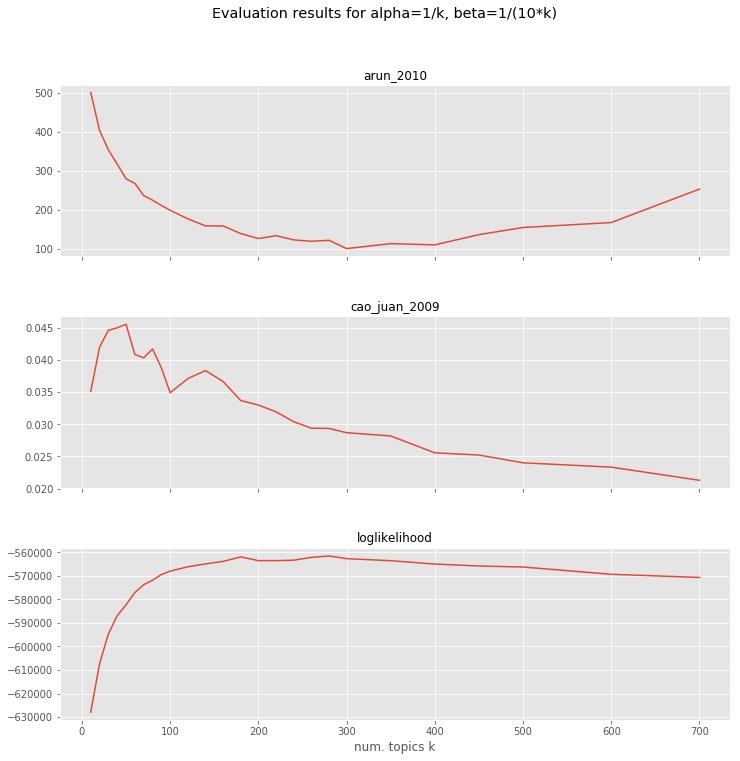

In [27]:
print('plotting evaluation results')
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
plot_eval_results(results_by_n_topics, xaxislabel='num. topics k',
                  title='Evaluation results for alpha=1/k, beta=1/(10*k)', figsize=(12, 12))
#plt.savefig('data/lda_evaluation_plot.png')
plt.show()

In [34]:
results_by_n_topics = results_by_parameter(eval_results5, 'n_topics')
logTopics=logScore=-999999
caoTopics=caoScore=arunTopics=arunScore=999999
for res in results_by_n_topics:
    if res[1]['loglikelihood'] > logScore:
        logScore = res[1]['loglikelihood']
        logTopics = res[0]
    if res[1]['cao_juan_2009'] < caoScore:
        caoScore = res[1]['cao_juan_2009']
        caoTopics = res[0]
    if res[1]['arun_2010'] < arunScore:
        arunScore = res[1]['arun_2010']
        arunTopics = res[0]
print("arun: %s \t %s" % (arunScore, arunTopics))
print("cao : %s \t %s" % (caoScore, caoTopics))
print("log : %s \t %s" % (logScore, logTopics))

arun: 101.63929316322032 	 300
cao : 0.021287381873527293 	 700
log : -561521.3818909788 	 280


## Runing LDA
### topics: 30 / alpha: 1/k / beta: 0,1

In [36]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel =  models.LdaMulticore(doc_term_matrix,
                                num_topics=30,
                                id2word = dictionary,
                                passes=50,
                                workers=16,
                                alpha=1/30,
                                eta=0.1)

In [37]:
a =(ldamodel.print_topics(num_topics=30, num_words=5))
for x in a:
    print(x)

(0, '0.126*"nobel" + 0.117*"biocare" + 0.088*"placement" + 0.088*"technology" + 0.079*"announce"')
(1, '0.073*"bone" + 0.067*"titanium" + 0.061*"graft" + 0.049*"mesh" + 0.045*"check"')
(2, '0.076*"bone" + 0.062*"designed" + 0.056*"integration" + 0.054*"antibacterial" + 0.053*"facilitate"')
(3, '0.109*"titanium" + 0.063*"made" + 0.038*"internal" + 0.033*"abutment" + 0.033*"used"')
(4, '0.047*"evolution" + 0.046*"quality" + 0.042*"school" + 0.042*"high" + 0.040*"approved"')
(5, '0.039*"process" + 0.038*"costs" + 0.024*"bone" + 0.024*"ridge" + 0.024*"split"')
(6, '0.103*"screw" + 0.085*"restoration" + 0.077*"broken" + 0.073*"removal" + 0.070*"remover"')
(7, '0.067*"infection" + 0.065*"release" + 0.064*"risk" + 0.063*"slow" + 0.060*"reservoir"')
(8, '0.058*"mouth" + 0.053*"teeth" + 0.050*"cell" + 0.044*"stem" + 0.044*"grow"')
(9, '0.103*"system" + 0.102*"motor" + 0.074*"surgical" + 0.062*"handpiece" + 0.058*"brushless"')
(10, '0.076*"teeth" + 0.057*"study" + 0.055*"model" + 0.041*"infectio

In [39]:
#print(len(doc_term_matrix))
#print(len(tweets))

#print(doc_term_matrix[1])
#print(tweets[1])

for topico in range(0, 30):
    print("topico: %s" % topico)
    print(a[(topico)])
    print()
    tp = 0
    for i in range(0, len(tweets)):
    #for i in range(0, 1000):    
        topics = ldamodel.get_document_topics(doc_term_matrix[i])
        #rint("%s\n%s\n\n" % (tweets[i] ,topics))
        probTp = 0
        for t in topics:
            if t[1] > probTp:
                probTp = t[1]
                tpTweet = t[0]

        if tpTweet == topico:
            #print("%s\n%s\n\n" % (tweets[i] ,topics))
            print("%s\n\n" % (tweets[i]))
            tp = tp + 1
        if tp > 10:
            break
    print("\n\n-----------\n\n")


topico: 0
(0, '0.126*"nobel" + 0.117*"biocare" + 0.088*"placement" + 0.088*"technology" + 0.079*"announce"')

A short video from our dental implant suppliers Nobel Biocare explaining how dental implants work https://t.co/5Tb55EG1LM


Ad: What are Dental Implants? - https://t.co/upVIndu3rc


Nobel Biocare NobelActive Internal NP Dental Implant 3.5x11.5mm New Sealed https://t.co/VqdtACnYvw


RT @totalimplant: New Dental Implant Broken Screw Rescue Kit EMS Ship 3M Nobel Biocare Straumann https://t.co/nffuZTh8X0 https://t.co/N3iqt…


Nobel Biocare Osseoset 100 Dental Implant System https://t.co/KxPRrpj1xA Last Second Ebay Bid ↺RT, Favorite, Share


#Dental Implants Smart Converter Nobel biocare &amp; Straumann Fit https://t.co/VoL5rfq1RT https://t.co/ynnQGM930q


#Dental Implants Smart Socket Nobel biocare &amp; Straumann Fit Great Tool https://t.co/qIydet0lob https://t.co/dUL8HSC7jI


Nobel Biocare Dental Implants. Various sizes, x4. https://t.co/vsZrqEOA5F https://t.co/xxxMNDOB6q


Nobel

dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnPkp3


Check out Dental implant broken screw retrieval method set https://t.co/qLNe3Yw8il @eBay


dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnPkp3


dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnPkp3


dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnxJxv


dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnPkp3


dental implant broken screw removal remover retrieval restoration kit set https://t.co/Q6GtxnPkp3


RT @totalimplant: Dental implant screw removal kit broken implants screw remover fractured set https://t.co/wmxEUpPQIt https://t.co/eAq7m0I…


A Brief History of Dental Implants.My contribution @for_org #dentistry  https://t.co/5NcTtXaBzV https://t.co/JYOgPAN10k


RT @AImplantology: A Brief History of Dental

RT @GouasmiS: NEW study! Numerical comparison of the biomechanical behavior between healthy teeth and dental implant (dental pros… 


The mini dental implant procedure is much quicker and easier than that of the traditional dental implant and can... https://t.co/RQClW6fYsk


https://t.co/W4i32mCpUI
Dental Implants Perth- A Wise Move towards A Smiling Future


https://t.co/eH2yytXmMI
Dental Implants Perth- A Wise Move towards A Smiling Future


According to the American Academy of Implant Dentistry, dental implants possess a very high success rate of 98... https://t.co/WPmdDi6Ofj


.@DrToddShatkin of Aesthetic Associates reveals Jacob's new tooth after a mini dental implant procedure! https://t.co/RtSJNxj95u


Learning the Lingo – Dental Implants https://t.co/0FCLUeVb2Y




-----------


topico: 13
(13, '0.094*"straumann" + 0.038*"people" + 0.035*"free" + 0.035*"teeth" + 0.034*"rate"')

We use the Straumann® Dental Implant System. Find out more about dental implants here - https://t.co/

RT @TheDentalElf: Increased risk of dental implant failure in irradiated patients RR=2.63(95%CI;1.93-3.58) https://t.co/SzidBsnSVa


Increased risk of dental implant failure in irradiated patients RR=2.63(95%CI;1.93-3.58) https://t.co/SzidBsnSVa


RT @TheDentalElf: Increased risk of dental implant failure in irradiated patients RR=2.63(95%CI;1.93-3.58) https://t.co/SzidBsnSVa


Don’t miss- Dental Implants: survival rate in irradiated patients https://t.co/SzidBsnSVa


RT @TheDentalElf: Don’t miss- Dental Implants: survival rate in irradiated patients https://t.co/SzidBsnSVa


RT @TheDentalElf: Don’t miss- Dental Implants: survival rate in irradiated patients https://t.co/SzidBsnSVa


RT @TheDentalElf: Don’t miss- Dental Implants: survival rate in irradiated patients https://t.co/SzidBsnSVa


I've just posted a new blog: Vital Importance Of Dental Implants Maui

By Debra Martin

Your smile is imperative a… https://t.co/3i3qw6MiP6


Dental Implant Osteotome Concave Offset Set of 5by Dent

Integrated Implant Solutions has announced its fall Mini Dental Implant seminars: https://t.co/NCAR1RAWg3 @SterngoldLLC


People often wonder if dental implants from our Long Valley office are the right solution for them and their oral... https://t.co/m2XXjucnpT


RT @InDentalTech: Integrated Implant Solutions has announced its fall Mini Dental Implant seminars: https://t.co/NCAR1RAWg3 @SterngoldLLC


RT @totalimplant: Dental implant x15 mixed 3 types #euroteknika https://t.co/M12mLD5Uoj via @eBay


Dental Implants – What Determines Success and Failure https://t.co/UhCBEn3THf


Types of dental implants available https://t.co/FRJFTOmnCh


Types of Dental Implants https://t.co/oO5GaCtHzM


People often wonder if dental implants from our Newtown office are the right solution for them and their oral... https://t.co/xX3P7jnoox


dental implant imaging ppt PowerPoint Slide - https://t.co/SBVjuGpSxq  #ppt #dental #implant #imaging #ppt


dental implant imaging ppt PowerPoint Slide - https://t